# Data Analyst Task - Richmond Dias

In this notebook, I will carry out the steps outlined in the Data Analyst Task. This involves loading Ethereum and Bitcoin data into a data frame before processing, scrubbing, and analysing it to create price time-series plots and daily candlestick charts.

**Key objectives:**

**Q1)** Install the yfinance package and download 1month of Ethereum price data. You will
want a month of data separated by 2minute intervals and save it into a pandas dataframe.

**Q2)** Create a Bitcoin dataframe for the same period and create new columns in each of
your dataframes named 'Coin'.

**Q3)** Pick a day with the highest price volatility for both Coins and plot the price timeseries
using matplotlib.

**Q4)** Create daily candlestick (OHLC - Open High Low Close) charts using matplotlib for
each dataset. Bonus: Overlay a SMA (Simple moving average) on your plots. Show the
effects of varying the SMA lookback period.

## ----------------------------------------------------------------------------------------------------------------------------------

## **Q1) Install the `yfinance` Package and Download 1 Month of Ethereum Price Data with 2-Minute Intervals into a Pandas DataFrame**


---

**Approach:** I will first download and inspect the data to identify errors and any corrections that need to be made. Then, I will define a list of functions I intend to use to clean this dataset so it is suitable for plotting and analysis later on in the notebook. I will then evaluate the performance of these functions on a test dataset to see if they work as designed. Once I am confident that the functions work, I will use them to process and clean the downloaded Ethereum data. 

---


### Imports

In [1]:
#Installing the yfinance package as required
#pip install yfinance


In [2]:
#importing all the necessary packages and truncating their labels for easier reference
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf
from datetime import datetime
import matplotlib.ticker as mticker


### Downloading and Inspecting the Data

In [3]:
#Downloading 1 month of Ethereum price data separated by 2 minute intervals
eth_data = yf.download('ETH-USD', period='1mo', interval='2m')

# Ensures all the pandas dataframe values in this notebook are rounded to 2 d.p for better readability
pd.set_option('display.float_format', '{:.2f}'.format)

#Printing the first few rows of the dataframe to inspect it
print(eth_data.head())

[*********************100%***********************]  1 of 1 completed

Price                       Close    High     Low    Open  Volume
Ticker                    ETH-USD ETH-USD ETH-USD ETH-USD ETH-USD
Datetime                                                         
2025-01-03 03:10:00+00:00 3456.92 3456.92 3456.92 3456.92       0
2025-01-03 03:12:00+00:00 3455.84 3455.84 3455.84 3455.84       0
2025-01-03 03:14:00+00:00 3454.96 3454.98 3454.96 3454.98       0
2025-01-03 03:16:00+00:00 3455.97 3455.97 3455.95 3455.95   77824
2025-01-03 03:18:00+00:00 3457.01 3457.01 3457.01 3457.01       0


---
### Key Definitions:

**Interval:** the time interval by which data points are separated by (2min)

**Period:** The time period for which the data was downloaded over (1 month)

### Column Descriptions:

**Column units:** USD (for all columns) 

**Open:** Opening price of the asset at the start of the time interval 

**High:** Highest price the asset reached during the time interval (peak price)

**Low:** Lowest price the asset reached during the time interval  

**Close:** Closing price of the asset at the end of the time interval  

**Volume:** The value of a crypto asset traded during the time interval

---

In [4]:
#Ensuring all the columns have the correct data type
print(eth_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21629 entries, 2025-01-03 03:10:00+00:00 to 2025-02-03 03:08:00+00:00
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, ETH-USD)   21629 non-null  float64
 1   (High, ETH-USD)    21629 non-null  float64
 2   (Low, ETH-USD)     21629 non-null  float64
 3   (Open, ETH-USD)    21629 non-null  float64
 4   (Volume, ETH-USD)  21629 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1013.9 KB
None


---

Reviewing the summary and header information of the data frame helped me understand some of the adjustments that would need to be made. For example, converting the datetime index into a column, and flattening the column names to remove the ticker label attached to it (allows for easier and more efficient referencing when accessing column data).

Furthermore, it highlighted the memory usage of this data frame, which made me aware of the large number of rows within the data; hence, optimising the memory usage for such a large dataset would be beneficial. Given the data's granularity for the selected period, I need to optimise the data frame to ensure smooth running and processing efficiency with this notebook.

---

### Defining Various Functions to Optimize the Loading, Cleaning, and Processing of the Crypto Asset Data

---

Anticipating the need to load, scrub and optimize different datasets (e.g. Ethereum and Bitcoin data), I defined functions to ensure this notebook remains concise and efficient. I also decided to define all the functions for this part of the task into one cell for easy reference. Given the number of functions I defined, this measure avoids having to scroll and search excessively for a selected function.

---

In [5]:
def fetch_coin_data(coin, period, interval):
    
    ''' This function uses the yfinance package to download historical price data for a given crypto asset.
    It fetches 1 month of data separated at 2-minute intervals and stores the results in a dataframe. 

    Parameters:
        coin: (str) The ticker symbol representing the crypto asset 
        period: (str) The duration for which the data is to be downloaded over (e.g., '1mo' for one month)
        interval: (str) The intervals by which the data points are separated by (e.g., '2m' for 2-minute intervals)

    Return:
        coin_data: (dataframe) The dataframe containing the downloaded historical price data
        coin_data_originalcopy: (dataframe) Copy of the downloaded historical price data

    '''    
    
    # Downloading 1 month of the coin's price data separated by 2 minute intervals and loading it into a dataframe
    coin_data = yf.download(coin, period= period, interval= interval)
    
    # Saves a copy of the original dataframe for comparison purposes later on
    coin_data_originalcopy = coin_data.copy()
    
    # Returning the dataframe for further processing, analysis and plotting purposes
    return coin_data, coin_data_originalcopy

# -----------------------------------------------------------------------------------------------------------------------

def show_info(coin_data, ticker, num_rows=3):
    
    ''' This function provides an overview of the crypto asset's dataframe - its structure, column properties, 
    and sample data from the beginning and end of the dataset.

    Parameters:
        coin_data: (dataframe) The dataframe containing the crypto asset's historical price and datetime data
        num_rows: (int) An optional argument - The number of rows to display for the head and tail of the dataframe 
                  otherwise defaults to 3.
        ticker: (str) The ticker symbol representing the crypto asset 

    Return:
        This function prints the dataframe's summary information and sample header and tail-end values of the dataframe
    '''

    # Prints the general and summary information for inspection
    print("\n")
    print("--------------------------")
    print(f"Overview of {ticker} Data")
    print("--------------------------")
    print("\n")
    print(coin_data.info())
    
    # Prints structure and column information regarding the dataframe
    print('------------------------------------------------------------------------------')
    print(f"Column Properties")
    print("-------------------")
    print(coin_data.columns)
    print('------------------------------------------------------------------------------')
    
    # Prints a brief overview of the beginning of the dataset for review
    print(f"Header data")
    print("--------------")
    print(coin_data.head(num_rows))
    print('------------------------------------------------------------------------------')
    
    # Prints a brief overview of the tail-end of the dataset for review
    print(f"tail-end values of the dataframe")
    print("----------------------------------")
    print(coin_data.tail(num_rows))
    
# -----------------------------------------------------------------------------------------------------------------------

def scrub_data(coin_data):
    
    ''' This function scrubs and cleans the crypto asset's dataframe. It detects, reports and removes any invalid values,
        negative or zero price values, null values, and duplicate timestamps.

    Parameters:
        coin_data: (dataframe) The dataframe containing the crypto asset's historical price and datetime data

    Return:
        coin_data: (dataframe) The cleaned dataframe
    '''

    print("\n-----------------------------------")
    print(f"INITIATING THE SCRUBBING PROCESS")
    print("-----------------------------------\n")
    
    # Due to the multi index nature of the dataframe, only the first label
    # of the column name is accessed. So we are flattening the column
    # names before further processing it
    
    if isinstance(coin_data.columns, pd.MultiIndex):
        coin_data.columns = [col[0] for col in coin_data.columns] 

    # Removing the datetime index and setting it as a column
    if 'Datetime' not in coin_data.columns:
        coin_data.reset_index(inplace=True)
        coin_data.rename(columns={'index': 'Datetime'}, inplace=True)
        
    # Re-ordering the columns for better readability 
    coin_data = coin_data[['Datetime', 'Open', 'High', 'Low', 'Close', 'Volume']]
        
    # checks for and removes null values in the dataframe
    
    if not coin_data.isnull().sum().any():    
        print(f"There are no null values present")
    else:
        print(f"Null values were detected within the dataset, removing them now:\n {coin_data[coin_data.isnull().any(axis=1)]}.")
        coin_data = coin_data.dropna().reset_index(drop=True)

    print('-------------------------------------------------------------------------')

    
    # checks for and removes rows with duplicate timestamps in the dataframe, keeping the first instance
    
    duplicated_data = coin_data[coin_data['Datetime'].duplicated(keep=False)]
    if duplicated_data.empty:
        print("No duplicated timestamps data detected")
    else:
        print(f" There are {len(duplicated_data)} rows where duplicated data was detected, removing them now:")
        print(duplicated_data)
        coin_data = coin_data.drop_duplicates(subset='Datetime', keep='first').reset_index(drop=True)
    
    print('-------------------------------------------------------------------------')
    
    
    # checking and removing any invalid OHLC entries where for example - the highest price 
    # on a particular day is less than the lowest price for the coin

    Invalid_data = coin_data[
        (coin_data['High'] < coin_data['Low']) |
        (coin_data['High'] < coin_data['Open']) |
        (coin_data['Close'] < coin_data['Low']) |
        (coin_data['High'] < coin_data['Close']) |
        (coin_data['Open'] < coin_data['Low']) 
    ]
    
    if Invalid_data.empty:
        print("No invalid OHLC values detected")
        
    else:
        print(f" There are {len(Invalid_data)} rows where invalid data OHLC was detected, removing them now:")
        print(Invalid_data)
        coin_data = coin_data[~(
                             (coin_data['High'] < coin_data['Low']) |
                             (coin_data['High'] < coin_data['Open']) |
                             (coin_data['Close'] < coin_data['Low']) |
                             (coin_data['High'] < coin_data['Close']) |
                             (coin_data['Open'] < coin_data['Low'])
                                                                  )]
    print('-------------------------------------------------------------------------')
    
    
    #Checking for negative values in the entire dataset (ignoring the datimecolumn) - and removes them
    
    coin_data_test = coin_data.drop(columns='Datetime')
    Negative_data = (coin_data_test < 0).any(axis=1)
    negative_rows_count = Negative_data.sum()

    if negative_rows_count == 0:
        print("No negative values detected")
    else:
        print(f"There are {negative_rows_count} rows where negative values were detected, removing them now:")
        print(coin_data[Negative_data])
        coin_data = coin_data[~Negative_data].reset_index(drop=True)

    print('-------------------------------------------------------------------------')
        
    #Drops the Volume column from the dataframe
    coin_data_test = coin_data.drop(columns=['Datetime', 'Volume'])
    
    #Checking for and removes any zero values within the whole dataframe excluding the volume and datetime column
    
    zero_values = coin_data_test[(coin_data_test == 0).any(axis=1)]  
   
    if zero_values.empty:
        print("No zero values detected (ignoring the volume and datetime column within the dataframe)")
    else:
        print(f"There are {len(zero_values)} rows where zero values were detected within the OHLC data, removing them now:")
        print(zero_values)
        coin_data = coin_data[~(coin_data_test == 0).any(axis=1)].reset_index(drop=True)
    
    print('-------------------------------------------------------------------------')
   
    return coin_data

# -----------------------------------------------------------------------------------------------------------------------
    
def remove_outliers(coin_data, threshold, ticker, daily_sample_data=None):
    
    ''' This function creates a Volatility column in a copy of the dataframe and detects outliers within the Volume 
    and Volatility columns of the crypto asset's dataframe and removes the corresponding rows from the dataframe. 
    Anomalies are identified by checking if any 2-minute volume or volatility intervals exceed a specified threshold 
    of the corresponding daily trading volume or volatility.

    Parameters:
        coin_data: (dataframe) The dataframe containing the crypto asset's historical price and datetime data
        threshold: (float) The multiplier used to define by what amount the 2-minute volume or volatility value 
                   must exceed the daily trading volume or volatility to be considered an outlier for that respective date
        ticker: (str) The ticker symbol representing the crypto asset 

    Return:
        cleaned_coin_data: (dataframe) The original dataframe but with rows corresponding to outliers in the Volume and 
                           Volatility columns removed.
    '''

    #Creating a copy of our data
    coin_data_copy = coin_data.copy() 
    # Creating a volatility column of data for the 2min interval data
    coin_data_copy['Volatility'] = coin_data_copy['High'] - coin_data_copy['Low']
    
    # A for loop to enable us to test our function using test data or fetch daily data
    # for processing and analysis purposes
    if daily_sample_data is None:         
        daily_coin_data = yf.download(ticker, period='1mo', interval='1d')
    else:
        daily_coin_data = daily_sample_data.copy()
 
    # Dates from both datasets (2min and daily intervals) are normalised so they match in the same day
    
    coin_data_copy['date'] = pd.to_datetime(coin_data_copy['Datetime']).dt.normalize()
    
    # This condition ensures our function dynamically adjusts for the format/structure of the input dataframe
    # If the Datetime column exists, normalises dates from that column and if not normalises the dates from the index
    if 'Datetime' in daily_coin_data.columns:
        daily_coin_data['date'] = pd.to_datetime(daily_coin_data['Datetime']).dt.normalize()
    else:
        daily_coin_data['date'] = pd.to_datetime(daily_coin_data.index).normalize()

    
    # The values for the daily volume, high and low prices are mathced to the 2 minute interval data
    # Converting this columns into dictionaries allows for easier mapping
    # Setting the index to the date as mapping relies on the date being the index
    
    daily_volume = daily_coin_data.set_index('date')['Volume'].to_dict()
    daily_high = daily_coin_data.set_index('date')['High'].to_dict()
    daily_low = daily_coin_data.set_index('date')['Low'].to_dict()
      
    coin_data_copy['daily_volume'] = coin_data_copy['date'].map(daily_volume)
    coin_data_copy['daily_high'] = coin_data_copy['date'].map(daily_high)
    coin_data_copy['daily_low'] = coin_data_copy['date'].map(daily_low)
    
    # Caluclating the daily volatility
    coin_data_copy['daily_volatility'] = coin_data_copy['daily_high'] - coin_data_copy['daily_low']
      
    # Defining outliers as the 2 minute volume values exceeding the -> threshold * daily volume (for 
    # its respective date)
    volume_outliers = coin_data_copy[coin_data_copy['Volume'] > (threshold * coin_data_copy['daily_volume'])]
    volatility_outliers = coin_data_copy[coin_data_copy['Volatility'] > (threshold * coin_data_copy['daily_volatility'])]

    # Idenitfying the outliers to remove from the dataset
    outliers_index = np.unique(np.concatenate([volume_outliers.index, volatility_outliers.index]))
    
    # Checking if any outliers were computed
    if len(outliers_index) == 0:
        print(f"There were no anomalous values detected within the Volume or Volatility columns")
    else:
        print(f"{len(outliers_index)} anomalous values were detected and will be removed:")
        print(coin_data_copy.loc[outliers_index, ['Datetime', 'Volume', 'High', 'Low', 'Volatility', 'daily_volume', 
                                                  'daily_volatility']])
         
    cleaned_coin_data = coin_data.drop(index=outliers_index).reset_index(drop=True)
    return cleaned_coin_data

# -----------------------------------------------------------------------------------------------------------------------

def volume_checker(coin_data, Ticker):
    
    ''' This function displays statistics for the crypto asset's volume data 
    across different time intervals. It allows the user to ensure that the trading volumes are as expected 
    for the different intervals, including 2-minute, daily (24-hour), and weekly intervals.

    Parameters:
        coin_data: (dataframe) The dataframe containing the crypto asset's historical price and datetime data
        Ticker: (str) The ticker symbol representing the crypto asset 

    Return:
        None: This function prints the volume statistics for 2 minute, 1 day and 1 week intervals
    '''
    
    print("\n----------------------------------------")
    print(f" REVIEWING THE TRADING VOLUME FOR {Ticker}")  
    print("----------------------------------------\n")
    #Printing the stats for the coin to ensure the volume is as expected in
    # relation our time frame
    print(f"The {Ticker} trading volume for a 2 minute interval is:")
    print('------------------------------------------------')
    print(coin_data['Volume'].describe())
    print('-------------------------------------------------------------------------')

    #Printing the stats for the coin's volume data for 1 day intervals
    print(f"\nThe {Ticker} trading volume for a 24h interval is:")
    print('------------------------------------------------')
    coin_data_day = yf.download(Ticker, period='1mo', interval='1d')
    print(coin_data_day['Volume'].describe())
    print('-------------------------------------------------------------------------')

    #Printing the stats for the coin's volume data for 1 week intervals
    print(f"\nThe {Ticker} trading volume for one week intervals is:")
    print('------------------------------------------------')
    coin_data_week = yf.download(Ticker, period='1mo', interval='1wk')
    print(coin_data_week['Volume'].describe())
    print('-------------------------------------------------------------------------')
        
    
# -----------------------------------------------------------------------------------------------------------------------
# -----------------------------------------------------------------------------------------------------------------------

def connect_df(df_one, df_two, remove_column, remove_condition):
    
    ''' This function concatenates two dataframes side by side for easier comparison and readability.
    It also gives the user the option to remove duplicate date column and adds a space in the column headers 
    for better distinction between the two connected dataframes. It allows the user to view the dataframes of 
    the crypto coins in one single output instead of spreading it over multiple cells and outputs. Ensures our Notebook 
    remains concise.

    Parameters:
        df_one: (dataframe) The first dataframe containing crypto asset data 
        df_two: (dataframe) The second dataframe containing crypto asset data 
        remove_column: (int) The index of the column to be removed to enhance readability of the output
        remove_condition: (int) If this condition is given the value of one, this function
                           will remove a specified column

    Return:
        connected_df: (dataframe) The concatenated dataframe incase the user wants to process it further
    '''

    
    # Concatenating the two dataframes of the coins side by side for easier readability 
    connected_df = pd.concat([df_one, df_two], axis=1)
    
    # if remove_condition = 1, the specified column is removed, otherwise the dataframe returns all columns
    if remove_condition == 1:
        # Removing the dupicate date column
        connected_df.iloc[:, remove_column] = ""  
        
        # Adding a space in between the Coin and Open column within the connected df, 
        # to allow the user to distinguish between Etheirum and Bitcoin data easier 
        connected_df.columns.values[remove_column] = "\u200B"
        
    else:
    
        # Displays the two dataframes (for example: Ethereum and Bitcoin) side by side for better clarity
        connected_df
    
    return connected_df

# -----------------------------------------------------------------------------------------------------------------------
# -----------------------------------------------------------------------------------------------------------------------

def optimise_memory(coin_data, dp=2):
    
    ''' This function optimizes the memory usage of the crypto asset's dataframe  
    by analyzing the range of values in all columns and converting them to smaller, more efficient data types when possible. 

    Parameters:
        coin_data: (dataframe) The dataframe containing the crypto asset's historical price and datetime data
               dp: (int) Decimal places to round figures by, defaults to 2
    Return:
        coin_data: (dataframe) The dataframe with optimized memory usage
    '''

    print("\n------------------------------------")
    print(f"OPTIMISING DATAFRAME MEMORY USAGE")
    print("------------------------------------\n")
    
    # Computes the intitial memory usage
    initial_memory = coin_data.memory_usage()
    initial_memory_MB = initial_memory.sum() / (1024**2)
    print(f"The initial memory usage of the dataframe is {initial_memory_MB: .{dp}f} MB \n")
    
    #Checking for the highest and lowest values within the Volume column
    max_volume = np.max(coin_data['Volume'])
    min_volume = np.min(coin_data['Volume'])
    print(f" Scanning the Volume Column")
    print('----------------------------')
    print(f"\nHighest value:{max_volume}, Lowest Value:{min_volume}")

    #The maximium allowed values for each data type
    int32_cap = 2_147_483_648
    float32_cap = 3.4028235*(10**38)
    
    #Creating a for loop to convert the datatype of the Volume column if possible
    if max_volume < int32_cap and min_volume >= -int32_cap:
        
        #Only selecting columns that have the float64 type for conversion
        int64_columns = coin_data.select_dtypes(include=['int64']).columns
        
        #Converting selected columns to the float32 data type to reduce memory usage
        coin_data[int64_columns] = coin_data[int64_columns].astype('int32')
        print(f"Converted the Volume column data type from int64 to int32.")
            
    #Dropping the datetime and volumn columns respectively
    coin_data_test = coin_data.drop(columns = 'Datetime')
    coin_drop_volume = coin_data_test.drop(columns='Volume') 
    
    #Checking for the highest and lowest values within the rest of the dataset
    max_dropvolume = np.max(coin_drop_volume)
    min_dropvolume = np.min(coin_drop_volume)
    print(f"\nScanning the Dataset excluding the volume and Datetime column")
    print('-----------------------------------------------------------------')
    print(f"\nHighest value:{max_dropvolume}, Lowest Value:{min_dropvolume}\n")

    #Selecting all columns except for Datetime and Volume
    #Creating a for loop to convert the datatype of the columns in possible
    
    if max_dropvolume < float32_cap and min_dropvolume >= -float32_cap:
        
        #Only selecting columns that have the float64 type for conversion
        float64_columns = coin_data.select_dtypes(include=['float64']).columns
        
        #Converting selcted columns to the float32 data type to reduce memory usage
        coin_data[float64_columns] = coin_data[float64_columns].astype('float32')
        print(f"Converted the data types of {len(float64_columns)} OHLC-related columns from float64 to float32.")

    final_memory = coin_data.memory_usage()
    final_memory_MB = final_memory.sum() / (1024**2)
    print(f"\nAfter optimisation, the memory usage of the dataframe is {final_memory_MB: .{dp}f} MB \n")  
    
    percent_reduction = ((initial_memory_MB - final_memory_MB) / initial_memory_MB) * 100
    
    print(f"Memory usage reduced by:{(initial_memory_MB - final_memory_MB): .{dp}f} MB,{percent_reduction: .2f}% \n")  
   
    print(f"\nMEMORY OPTIMISATION COMPLETE")    
    return coin_data

# -----------------------------------------------------------------------------------------------------------------------
# -----------------------------------------------------------------------------------------------------------------------

def Show_missing_timestamps(coin_data):
    
    ''' This function scans the datetime column of the crypto asset's dataframe within 2-minute intervals. 
        If missing timestamps are detected, it returns the count and displays a sample of the missing values.

    Parameters:
        coin_data: (dataframe) The dataframe containing the crypto asset's historical price and datetime data

    Return:
        This function prints out the number of missing timestamps and a sample of missing values if detected
    '''
     
    print("\n----------------------------")
    print(f"DETECTING MISSING TIMESTAMPS")
    print("----------------------------\n") 
    
    # Finds the earliest and latest timestamps within the whole datetime column
    start_time = coin_data['Datetime'].min()
    end_time = coin_data['Datetime'].max()
    
    # Creates a complete datetime index that emulates the same range and frequency of the datetime column of the dataframe
    time_index = pd.date_range(start= start_time, end= end_time, freq="2T")
    
    # Subtracts the existing timestamps from the full index we created to identify missing timestamps
    missing_timestamps = set(time_index) - set(coin_data['Datetime'])
    
    # Informs the user if missing timestamps are detected, if detected, prints the number and smaple of missing values
    if not missing_timestamps:
        print(f"There are no missing timestamps")
    else:
        print(f"There are {len(missing_timestamps)} missing timestamps within the dataframe and a subset of these are: \n")
        print(sorted(missing_timestamps)[:5])
        
# -----------------------------------------------------------------------------------------------------------------------
# -----------------------------------------------------------------------------------------------------------------------

def Fix_missing_timestamps(coin_data):
    
    ''' This function identifies and fixes any missing timestamps within the crypto asset's datetime column of the dataframe.  
         by reindexing the dataframe to include 2-minute intervals where there are missing values. It fills missing price 
         data using forward fill (the last known value) and sets missing volumes to 0 to avoid false trading activity.

    Parameters:
        coin_data: (dataframe) The dataframe containing the crypto asset's historical price and datetime data

    Return:
        coin_data: (dataframe) The updated dataframe with missing timestamps fixed and completes the data appropriately.
    '''

    print("\n----------------------------")
    print(f"FIXING MISSING TIMESTAMPS")
    print("----------------------------\n") 
    
    # Creates a complete datetime index that emulates the same range and frequency of the datetime column of the dataframe
    time_index = pd.date_range(start=coin_data['Datetime'].min(), end=coin_data['Datetime'].max(), freq="2T")

    # Converts the datetime column into a datetime object
    coin_data['Datetime'] = pd.to_datetime(coin_data['Datetime'], errors='coerce')
    
    # Indexes the datetime column, then reindexes it using a complete index (which we created), then resetting the index 
    coin_data_indexed = coin_data.set_index("Datetime")
    coin_data_reindexed = coin_data_indexed.reindex(time_index)
    
    # Resetting the index so datetime can be aceesed as a column of values can be accessed for plotting 
    # and analysis purposes later on
    coin_data_fixed = coin_data_reindexed.reset_index()

    # Rename the index back to the 'Datetime' column
    coin_data_fixed.rename(columns={"index": "Datetime"}, inplace=True)
  
    # For missing volume data, sets it to zero to avoid displaying false trading activity by forwardfilling
    coin_data_fixed['Volume'].fillna(0, inplace=True)
    # Converting the volume column back into 'int64' datatype after filling missing values
    coin_data_fixed['Volume'] = coin_data_fixed['Volume'].astype('int64')

    # forward fills the price data to fill missing values in OHLC columns
    coin_data_fixed.fillna(method="ffill", inplace=True)

    # Informs the user that the errors are fixed and calling the 'Show_missing_timestamps' to confirm this
    print("Fixed the missing timestamps, calling the Show_missing_timestamps function to confirm:")
    
    Show_missing_timestamps(coin_data_fixed)
    
    return coin_data_fixed

        

---

These functions systematically identify errors, print them to inform the user of their presence and then remove them accordingly. Within the code cell above, these functions scrub, clean and optimise the dataset by identifying, addressing and removing the following issues: 

`scrub_data()` - Detects and removes null values, duplicate timestamps, invalid OHLC price data, negative and zero values

`remove_outliers()` - Detects and eliminates outliers in the volume and volatility column

`Show_missing_timestamps()` and `Fix_missing_timestamps()` - Detects and removes missing and fixing timestamps to ensure a complete dataset.

`optimise_memory()` - Optimises memory usage for efficient processing. 


The `remove_outliers()` function only focused on scanning for outliers in the volume and volatility data of the dataset. This is because the OHLC prices of such crypto assets are likely to undergo extreme fluctuations at times due to the nature of the crypto market, making it challenging to identify what is an outlier and what can be attributed to the volatile nature of the market. Despite this, the conditions defined within the other functions still adequately detect and remove inconsistent values in the OHLC data.


Keeping the `Show_missing_timestamps()` and `Fix_missing_timestamps()` functions as separate entities allows for the flexibility of detecting missing timestamps without having to fix them immediately. This allows for cases where I am removing rows which could have contained outliers, enabling me to call the 'Show_missing_timestamps' function to confirm they have been removed without immediately filling them in.

---
    

## Executing the Functions Defined Above on a Test Dataset


---

Initially, I ran these functions on the downloaded Ethereum data and found no errors. However, when I tested my functions on a separate, randomly generated test dataset, I realised my functions didn't work as I had expected. This motivated me to test the functions I defined, analysing their outputs and refining them accordingly. I had to redefine some functions, such as `scrub_data()` and `remove_outliers()`, since I decided to call these functions on test data in addition to data that can be downloaded using the finance package. This ensured they could be fed both test and downloaded data and switch dynamically from testing to practical use. 

For testing purposes, I evaluated the performance of the functions in separate cells instead of calling all functions within one cell. This allows for better clarity of the evaluation outcome for the different functions, ensuring they are assessed and refined appropriately.

---

### Evaluating the Accuracy of the `scrub_data()` and `remove_outliers()` Functions in Cleaning the Dataset of Invalid Entries and Outliers 

In [6]:
# Creating a test dataframe simulating 2 minute intervals with invalid entries embedded within it, for example:
# Duplicate timestamps at index 3 and 10 (2025-01-01 00:06:00)
# Row 9 has a zero entry for the Low column 
# Row 5 has High < Low
# Row 8 has NaN value for the High column

datetime_range = pd.date_range(start="2025-01-01 00:00:00", periods=10, freq="2T")

df_scrub_test = {
    'Datetime': datetime_range.tolist() + [datetime_range[3]],  
    'Close': [3200, 3300, 3100, 3400, 3500, 3300, 3600, 3700, 3900, 4000, 3700],  
    'High': [3300, 3400, 3150, 3500, 3450, 2500, 3700, 3750, np.nan, 4100, 3800],  
    'Low': [3100, 3200, 3050, 3450, 3400, 2600, -50, 3650, 3800, 0, 3600],  
    'Open': [3150, 3250, 3125, 3300, 3480, 2600, 3550, 3680, 3820, 3950, 3650],
    'Volume': [10000, 15000, 12000, 13000, 11000, 14000, 25000, 20000, 22000, 19000, 30000], 
}

df_scrub_test = pd.DataFrame(df_scrub_test)



# Creating a test dataframe simulating 2 minute intervals as before but now with added anomalies
# The 'Low' column has an anomaly: 1500 at index 17. 
# This leads to a anomaly in the volatility column when comparred to daily volatility as seen later on
# The 'Volume' column has an anomaly: 25000 at index 16

df_2min_test = {
    'Datetime': pd.date_range(start='2025-01-02 00:00:00', periods=20, freq='2T'),
    'Close': [4200, 4300, 4100, 4150, 4200, 4300, 4350, 4400, 4450, 4500, 4550, 4600, 4650, 4700, 4750, 4800, 4850, 4900, 4950, 5000],
    'High': [4250, 4350, 4150, 4200, 4250, 4400, 4450, 4500, 4550, 4600, 4650, 4700, 4750, 4800, 4850, 4900, 4950, 5000, 5050, 5100],
    'Low': [4150, 4250, 4050, 4100, 4150, 4250, 1500, 4350, 4400, 4450, 4500, 4550, 4600, 4650, 4700, 4750, 4800, 4850, 4900, 4950],
    'Open': [4180, 4280, 4080, 4130, 4180, 4280, 4330, 4380, 4430, 4480, 4530, 4580, 4630, 4680, 4730, 4780, 4830, 4880, 4930, 4980],
    'Volume': [2000, 2200, 1800, 1900, 2000, 25000, 2800, 3000, 2700, 2600, 2900, 3200, 3400, 3300, 3500, 3700, 3900, 4100, 4300, 4500]
}

df_2min_test = pd.DataFrame(df_2min_test)


# Concatenating both 2 min interval DataFrames
combined_df = pd.concat([df_scrub_test, df_2min_test], ignore_index=True)


---

I decided to create and connect two sample test data frames instead of creating one to emulate the downloaded real world data over multiple days. This also restricts me from analysing an overly large data frame - if I wanted data over numerous days, for example, retaining the 2-minute granularity. Generating the data frame in this format allows me to easily edit the values to dynamically create errors as needed.

---

In [7]:
# Creating a test dataframe simulating daily intervals to evaluating the performance of the remove_outliers function
# when comparing the combined two minute dataframe to this dataset, there should be anomalies when comparing the daily volume 
# and volatility 

df_daily_test = {
    'Datetime': pd.date_range(start='2025-01-02', periods=5, freq='D'),
    'Close': [4500, 4600, 4700, 4800, 4900],
    'Open': [4400, 4500, 4600, 4700, 4800],
    'High': [4550, 4650, 4750, 4850, 4950],
    'Low': [4300, 4400, 4500, 4600, 4700],
    'Volume': [15000, 17000, 18000, 19000, 20000]
}

df_daily_test = pd.DataFrame(df_daily_test)

# displays the test dataframe with daily intervals
df_daily_test

,Datetime,Close,Open,High,Low,Volume
0,2025-01-02,4500,4400,4550,4300,15000
1,2025-01-03,4600,4500,4650,4400,17000
2,2025-01-04,4700,4600,4750,4500,18000
3,2025-01-05,4800,4700,4850,4600,19000
4,2025-01-06,4900,4800,4950,4700,20000


In [8]:
# Displays the combined test DataFrame with all the various anomalies and errors embedded within it
combined_df


,Datetime,Close,High,Low,Open,Volume
0,2025-01-01 00:00:00,3200,3300.00,3100,3150,10000
1,2025-01-01 00:02:00,3300,3400.00,3200,3250,15000
2,2025-01-01 00:04:00,3100,3150.00,3050,3125,12000
3,2025-01-01 00:06:00,3400,3500.00,3450,3300,13000
4,2025-01-01 00:08:00,3500,3450.00,3400,3480,11000
5,2025-01-01 00:10:00,3300,2500.00,2600,2600,14000
6,2025-01-01 00:12:00,3600,3700.00,-50,3550,25000
7,2025-01-01 00:14:00,3700,3750.00,3650,3680,20000
8,2025-01-01 00:16:00,3900,NaN,3800,3820,22000
9,2025-01-01 00:18:00,4000,4100.00,0,3950,19000


In [9]:
# Calling the scrub_data and remove_outliers functions to evaluate their performance on test data which has 
# anomalies and invalid entries embedded within them
scrubbed_df = scrub_data(combined_df)
df_test_cleaned = remove_outliers(scrubbed_df, 1,'ETH-USD', df_daily_test)


-----------------------------------
INITIATING THE SCRUBBING PROCESS
-----------------------------------

Null values were detected within the dataset, removing them now:
              Datetime  Open  High   Low  Close  Volume
8 2025-01-01 00:16:00  3820   NaN  3800   3900   22000.
-------------------------------------------------------------------------
 There are 2 rows where duplicated data was detected, removing them now:
             Datetime  Open    High   Low  Close  Volume
3 2025-01-01 00:06:00  3300 3500.00  3450   3400   13000
9 2025-01-01 00:06:00  3650 3800.00  3600   3700   30000
-------------------------------------------------------------------------
 There are 3 rows where invalid data OHLC was detected, removing them now:
             Datetime  Open    High   Low  Close  Volume
3 2025-01-01 00:06:00  3300 3500.00  3450   3400   13000
4 2025-01-01 00:08:00  3480 3450.00  3400   3500   11000
5 2025-01-01 00:10:00  2600 2500.00  2600   3300   14000
---------------------

In [10]:
# Calling the scrub_data and remove_outliers functions on the cleaned dataset to show that the errors were removed
scrubbed_df = scrub_data(df_test_cleaned)
df_test_cleaned = remove_outliers(scrubbed_df, 1,'ETH-USD', df_daily_test)



-----------------------------------
INITIATING THE SCRUBBING PROCESS
-----------------------------------

There are no null values present
-------------------------------------------------------------------------
No duplicated timestamps data detected
-------------------------------------------------------------------------
No invalid OHLC values detected
-------------------------------------------------------------------------
No negative values detected
-------------------------------------------------------------------------
No zero values detected (ignoring the volume and datetime column within the dataframe)
-------------------------------------------------------------------------
There were no anomalous values detected within the Volume or Volatility columns


In [11]:
# Printing out the statistics of the trading volume of the test dataset before and after cleaning it
# Comparing the volume statistics to the daily trading volume to ensure that the maximum volume 
# in the 2-minute interval dataset does not exceed the maximum daily volume after cleaning.

print(f"The trading volume for the original test dataset (2min intervals)\n")
print(combined_df['Volume'].describe())

print(f"\nThe trading volume for the daily test dataset (daily intervals)\n")
print(df_daily_test['Volume'].describe())

print(f"\nThe trading volume for the cleaned test dataset (2min intervals)\n")
print(df_test_cleaned['Volume'].describe())

The trading volume for the original test dataset (2min intervals)

count      31.00
mean     8832.26
std      8406.56
min      1800.00
25%      2850.00
50%      3900.00
75%     13500.00
max     30000.00
Name: Volume, dtype: float64

The trading volume for the daily test dataset (daily intervals)

count       5.00
mean    17800.00
std      1923.54
min     15000.00
25%     17000.00
50%     18000.00
75%     19000.00
max     20000.00
Name: Volume, dtype: float64

The trading volume for the cleaned test dataset (2min intervals)

count      22.00
mean     5090.91
std      4777.72
min      1800.00
25%      2625.00
50%      3350.00
75%      4250.00
max     20000.00
Name: Volume, dtype: float64


---

The original unclean dataset had a max volume of 30000, which exceeded the daily volume of 20000. Within the output above, it can be seen that the cleaned dataset now has a max volume of 20000 which aligns with the daily max volume for that specific date.

---

In [12]:
# Displaying the cleaned dataframe after being scrubbed for invalid entries and having anomalies removed
connect_df(combined_df, df_test_cleaned, 7, 0)

,Datetime,Close,High,Low,Open,Volume,Datetime,Open,High,Low,Close,Volume
0,2025-01-01 00:00:00,3200,3300.00,3100,3150,10000,2025-01-01 00:00:00,3150.00,3300.00,3100.00,3200.00,10000.00
1,2025-01-01 00:02:00,3300,3400.00,3200,3250,15000,2025-01-01 00:02:00,3250.00,3400.00,3200.00,3300.00,15000.00
2,2025-01-01 00:04:00,3100,3150.00,3050,3125,12000,2025-01-01 00:04:00,3125.00,3150.00,3050.00,3100.00,12000.00
3,2025-01-01 00:06:00,3400,3500.00,3450,3300,13000,2025-01-01 00:14:00,3680.00,3750.00,3650.00,3700.00,20000.00
4,2025-01-01 00:08:00,3500,3450.00,3400,3480,11000,2025-01-02 00:00:00,4180.00,4250.00,4150.00,4200.00,2000.00
5,2025-01-01 00:10:00,3300,2500.00,2600,2600,14000,2025-01-02 00:02:00,4280.00,4350.00,4250.00,4300.00,2200.00
6,2025-01-01 00:12:00,3600,3700.00,-50,3550,25000,2025-01-02 00:04:00,4080.00,4150.00,4050.00,4100.00,1800.00
7,2025-01-01 00:14:00,3700,3750.00,3650,3680,20000,2025-01-02 00:06:00,4130.00,4200.00,4100.00,4150.00,1900.00
8,2025-01-01 00:16:00,3900,NaN,3800,3820,22000,2025-01-02 00:08:00,4180.00,4250.00,4150.00,4200.00,2000.00
9,2025-01-01 00:18:00,4000,4100.00,0,3950,19000,2025-01-02 00:14:00,4380.00,4500.00,4350.00,4400.00,3000.00


---
To optimise the clarity and readability of this notebook, I defined the `connect_df()` function. Initially, I displayed the original and cleaned data frames one after the other, either in the same cell as a printed data frame or across separate cells. This made it difficult to notice the difference between the two outputs. Therefore, this function enables data frames to be displayed side by side where possible. This allows the user to easily track the existence or removal of any errors, anomalies or changes within the data frames.

---

### Testing if the `optimise_memory()` Function Has a Measurable Impact

In [13]:
df_test_optimised = optimise_memory(df_test_cleaned, dp=5)


------------------------------------
OPTIMISING DATAFRAME MEMORY USAGE
------------------------------------

The initial memory usage of the dataframe is  0.00113 MB 

 Scanning the Volume Column
----------------------------

Highest value:20000, Lowest Value:1800
Converted the Volume column data type from int64 to int32.

Scanning the Dataset excluding the volume and Datetime column
-----------------------------------------------------------------

Highest value:5100.0, Lowest Value:3050.0

Converted the data types of 1 OHLC-related columns from float64 to float32.

After optimisation, the memory usage of the dataframe is  0.00071 MB 

Memory usage reduced by: 0.00042 MB, 37.16% 


MEMORY OPTIMISATION COMPLETE


### Testing if the `show_missing_timestamps()` and `fix_missing_timestamps()` Functions Work Appropriately

In [14]:
# Calling the show and missing timestamps functions to evaluate if they work as expected
Show_missing_timestamps(df_test_optimised)
Fix_missing_timestamps(df_test_optimised)


----------------------------
DETECTING MISSING TIMESTAMPS
----------------------------

There are 718 missing timestamps within the dataframe and a subset of these are: 

[Timestamp('2025-01-01 00:06:00'), Timestamp('2025-01-01 00:08:00'), Timestamp('2025-01-01 00:10:00'), Timestamp('2025-01-01 00:12:00'), Timestamp('2025-01-01 00:16:00')]

----------------------------
FIXING MISSING TIMESTAMPS
----------------------------

Fixed the missing timestamps, calling the Show_missing_timestamps function to confirm:

----------------------------
DETECTING MISSING TIMESTAMPS
----------------------------

There are no missing timestamps


,Datetime,Open,High,Low,Close,Volume
0,2025-01-01 00:00:00,3150.00,3300.00,3100.00,3200.00,10000
1,2025-01-01 00:02:00,3250.00,3400.00,3200.00,3300.00,15000
2,2025-01-01 00:04:00,3125.00,3150.00,3050.00,3100.00,12000
3,2025-01-01 00:06:00,3125.00,3150.00,3050.00,3100.00,0
4,2025-01-01 00:08:00,3125.00,3150.00,3050.00,3100.00,0
...,...,...,...,...,...,...
735,2025-01-02 00:30:00,4780.00,4900.00,4750.00,4800.00,3700
736,2025-01-02 00:32:00,4830.00,4950.00,4800.00,4850.00,3900
737,2025-01-02 00:34:00,4880.00,5000.00,4850.00,4900.00,4100
738,2025-01-02 00:36:00,4930.00,5050.00,4900.00,4950.00,4300


In [15]:
#printing the column property info before and after cleaning the test dataframe for comparison purposes

print(f"The test dataframe info before the scrubbing process:\n")
combined_df.info()

print("\n")

print(f"The test dataframe info after the scrubbing process:\n")
df_test_optimised.info()



The test dataframe info before the scrubbing process:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  31 non-null     datetime64[ns]
 1   Close     31 non-null     int64         
 2   High      30 non-null     float64       
 3   Low       31 non-null     int64         
 4   Open      31 non-null     int64         
 5   Volume    31 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 1.6 KB


The test dataframe info after the scrubbing process:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  22 non-null     datetime64[ns]
 1   Open      22 non-null     int32         
 2   High      22 non-null     float32       
 3   Low       22 

### Loading, Processing, and Scrubbing the Ethereum Data

---

I decided to call all these functions within a single cell, to avoid using multiple cells to display all the outputs. This enables the user to logically follow the order in which the functions have been called and the order of their outputs respectively. Furthermore, it avoids any confusion by grouping related and sequential outputs together. For example, reviewing the volume statistics after removing any related outliers to ensure none have remained.

---

In [16]:
# Calling all functions to load and process Ethereum data

# Assigning a variable to the crypto asset ticker to avoid hardcoding it in function arguments later
ETH_ticker = "ETH-USD"

# Loading Ethereum data for the same period and displaying it
eth_data, eth_data_OGcopy = fetch_coin_data(ETH_ticker, "1mo", "2m")
show_info(eth_data, ETH_ticker)
print('------------------------------------------------------------------------------')

# Scrubbing and remove outliers from the data
eth_data_scrubbed = scrub_data(eth_data)

eth_data_scrubbed = remove_outliers(eth_data_scrubbed, 1, ETH_ticker)
print('------------------------------------------------------------------------------')

#Checking the outliers were removed as expected
volume_checker(eth_data_scrubbed, ETH_ticker)

#Optimising memory usage and adding more columns for later tasks
eth_data_optimised = optimise_memory(eth_data_scrubbed, dp=2)
print('------------------------------------------------------------------------------')

# Finds and shows the missing timestamps within the dataset
Show_missing_timestamps(eth_data_optimised) 

# Fixes the missing timestamps within the datetime column and completes the rest of the columns
#ensuring a complete and consistent dataset for the given period
eth_data_cleaned = Fix_missing_timestamps(eth_data_optimised)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



--------------------------
Overview of ETH-USD Data
--------------------------


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21629 entries, 2025-01-03 03:10:00+00:00 to 2025-02-03 03:08:00+00:00
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, ETH-USD)   21629 non-null  float64
 1   (High, ETH-USD)    21629 non-null  float64
 2   (Low, ETH-USD)     21629 non-null  float64
 3   (Open, ETH-USD)    21629 non-null  float64
 4   (Volume, ETH-USD)  21629 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1013.9 KB
None
------------------------------------------------------------------------------
Column Properties
-------------------
MultiIndex([( 'Close', 'ETH-USD'),
            (  'High', 'ETH-USD'),
            (   'Low', 'ETH-USD'),
            (  'Open', 'ETH-USD'),
            ('Volume', 'ETH-USD')],
           names=['Price', 'Ticker'])
-------------------------------------


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

There were no anomalous values detected within the Volume or Volatility columns
------------------------------------------------------------------------------

----------------------------------------
 REVIEWING THE TRADING VOLUME FOR ETH-USD
----------------------------------------

The ETH-USD trading volume for a 2 minute interval is:
------------------------------------------------
count         21629.00
mean       37941710.60
std       426628468.69
min               0.00
25%               0.00
50%         1845248.00
75%        16529408.00
max     46152990720.00
Name: Volume, dtype: float64
-------------------------------------------------------------------------

The ETH-USD trading volume for a 24h interval is:
------------------------------------------------
Ticker        ETH-USD
count           31.00
mean   28072818317.68
std    13297675360.10
min    11647743556.00
25%    20338305988.00
50%    25991614661.00
75%    32419807061.00
max    70758678528.00
--------------------------

Ticker         ETH-USD
count             6.00
mean   145042894641.33
std     68395600863.09
min     70758678528.00
25%     96293136993.25
50%    137746353878.50
75%    174006403905.25
max    255437496284.00
-------------------------------------------------------------------------

------------------------------------
OPTIMISING DATAFRAME MEMORY USAGE
------------------------------------

The initial memory usage of the dataframe is  0.99 MB 

 Scanning the Volume Column
----------------------------

Highest value:46152990720, Lowest Value:0

Scanning the Dataset excluding the volume and Datetime column
-----------------------------------------------------------------

Highest value:3742.588134765625, Lowest Value:2196.839599609375

Converted the data types of 4 OHLC-related columns from float64 to float32.

After optimisation, the memory usage of the dataframe is  0.66 MB 

Memory usage reduced by: 0.33 MB, 33.33% 


MEMORY OPTIMISATION COMPLETE
----------------------------------------

---

When reviewing the trading volume across the two-minute, 24-hour, and weekly intervals, I noticed they seemed to be quite large values. When loading in the raw data frame, the column names have the ticker labelled attached to them as 'ETH-USD', which led me to believe the units of the column were USD. To confirm this, I went to Yahoo Finance to review the daily trading volume for ETH. By comparing the published value with the mean 24 hour interval trading volume in the output above, I was able to confirm that the trading volume was in fact in USD.

**source:** https://finance.yahoo.com/quote/ETH-USD/

---

I decided not to convert this volume from the value of ETH to the number of Ethereum coins traded using the following equation:


**(1)** $\text{Volume (ETH)}$ = $\frac{\text{Volume (USD)}}{\text{Close (USD)}}$
  

As for the purposes of this task and those that follow, it was clear we would not use the volume column of data or the volume of Ethereum coins traded. 

Reviewing these volume statics did however prompt me to ensure that the max volume traded in 2-minute intervals did not exceed the 24-hour interval. For example, if a spike in the volume occurred in a 2-minute interval, I wanted to confirm that it was acounted for in the daily trading volume; if it did not, it was a clear anomaly. This would lead me to create the `remove_outlier()` function, with a clear definition to check if the two-minute max value for the volume or volatility exceeded the daily trading volume and exclude such data points.

---

### **Q1)** Result

In [17]:
# Displaying the cleaned dataframe for Ethereum
eth_data_cleaned


,Datetime,Open,High,Low,Close,Volume
0,2025-01-03 03:10:00+00:00,3456.92,3456.92,3456.92,3456.92,0
1,2025-01-03 03:12:00+00:00,3455.84,3455.84,3455.84,3455.84,0
2,2025-01-03 03:14:00+00:00,3454.98,3454.98,3454.96,3454.96,0
3,2025-01-03 03:16:00+00:00,3455.95,3455.97,3455.95,3455.97,77824
4,2025-01-03 03:18:00+00:00,3457.01,3457.01,3457.01,3457.01,0
...,...,...,...,...,...,...
22315,2025-02-03 03:00:00+00:00,2486.76,2496.59,2486.76,2496.59,239124480
22316,2025-02-03 03:02:00+00:00,2493.34,2493.34,2490.37,2490.37,140492800
22317,2025-02-03 03:04:00+00:00,2496.41,2497.99,2496.41,2497.99,774455296
22318,2025-02-03 03:06:00+00:00,2504.89,2504.89,2504.89,2504.89,63258624


---

I decided not to call the `show.info()` function here, as I would call it at the end of task 2. This avoids having me calling it repeatedly since in task 2, we are adding another column, 'Coin'. Therefore it makes sense to display additional column properties and summarise the data frame properties once all data frame modifications are completed.

I did consider formatting the datetime column to be more readable. I decided against this, as I would then have to convert that column into a string format or replace the entire column itself to make it more readable. When I did this, it resulted in losing the ability to perform time-based operations on the data frame for filtering and plotting purposes later on.

---

## **Q2)** Create a Bitcoin DataFrame for the Same Period


Using the same functions as before which were used to load, clean and optimise the Ethereum data to load and process the Bitcoin data.

In [18]:
# Calling all functions to load, scrub and process Bitcoin data

# Assigning a variable to the crypto asset ticker to avoid hardcoding it in function arguments later
BTC_ticker = "BTC-USD"


# Loading bitcoin data for the same period and displaying it
btc_data, btc_data_OGcopy = fetch_coin_data(BTC_ticker, "1mo", "2m")
show_info(btc_data, BTC_ticker)
print('------------------------------------------------------------------------------')

# Scrubbing and remove outliers from the data
btc_data_scrubbed = scrub_data(btc_data)
btc_data_scrubbed = remove_outliers(btc_data_scrubbed, 1.0, BTC_ticker)
print('------------------------------------------------------------------------------')

#Checking the outliers were removed as expected
volume_checker(btc_data_scrubbed, BTC_ticker)

#Optimising memory usage and adding more columns for later tasks
btc_data_optimised = optimise_memory(btc_data_scrubbed, dp=2)
print('------------------------------------------------------------------------------')

# Finds and shows the missing timestamps within the dataset
Show_missing_timestamps(btc_data_optimised) 

# Fixes the missing timestamps within the datetime column and completes the rest of the columns
#ensuring a complete and consistent dataset for the given period
btc_data_cleaned = Fix_missing_timestamps(btc_data_optimised)

[*********************100%***********************]  1 of 1 completed




--------------------------
Overview of BTC-USD Data
--------------------------


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21797 entries, 2025-01-03 03:12:00+00:00 to 2025-02-03 03:08:00+00:00
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   21797 non-null  float64
 1   (High, BTC-USD)    21797 non-null  float64
 2   (Low, BTC-USD)     21797 non-null  float64
 3   (Open, BTC-USD)    21797 non-null  float64
 4   (Volume, BTC-USD)  21797 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1021.7 KB
None
------------------------------------------------------------------------------
Column Properties
-------------------
MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])
-------------------------------------

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

There were no anomalous values detected within the Volume or Volatility columns
------------------------------------------------------------------------------

----------------------------------------
 REVIEWING THE TRADING VOLUME FOR BTC-USD
----------------------------------------

The BTC-USD trading volume for a 2 minute interval is:
------------------------------------------------
count         21797.00
mean       34169011.55
std       421014258.25
min               0.00
25%               0.00
50%         2256896.00
75%        24778752.00
max     45904066560.00
Name: Volume, dtype: float64
-------------------------------------------------------------------------

The BTC-USD trading volume for a 24h interval is:
------------------------------------------------
Ticker         BTC-USD
count            31.00
mean    55414200716.35
std     26272841318.41
min     18860894100.00
25%     38763567842.00
50%     53769675818.00
75%     67882415917.00
max    126279678351.00
-----------------


[*********************100%***********************]  1 of 1 completed


Ticker         BTC-USD
count             6.00
mean   286306703701.17
std    165024154465.58
min     91768348672.00
25%    169375983989.75
50%    272097469500.50
75%    383544587456.75
max    526047818939.00
-------------------------------------------------------------------------

------------------------------------
OPTIMISING DATAFRAME MEMORY USAGE
------------------------------------

The initial memory usage of the dataframe is  1.00 MB 

 Scanning the Volume Column
----------------------------

Highest value:45904066560, Lowest Value:0

Scanning the Dataset excluding the volume and Datetime column
-----------------------------------------------------------------

Highest value:109110.390625, Lowest Value:89260.1015625

Converted the data types of 4 OHLC-related columns from float64 to float32.

After optimisation, the memory usage of the dataframe is  0.67 MB 

Memory usage reduced by: 0.33 MB, 33.33% 


MEMORY OPTIMISATION COMPLETE
------------------------------------------------

## **Q2)** Result


In [19]:
## Displaying the cleaned dataframe for Bitcoin
btc_data_cleaned


,Datetime,Open,High,Low,Close,Volume
0,2025-01-03 03:12:00+00:00,96937.62,96937.62,96927.62,96927.62,0
1,2025-01-03 03:14:00+00:00,96889.23,96889.23,96889.23,96889.23,0
2,2025-01-03 03:16:00+00:00,96890.77,96890.77,96890.77,96890.77,0
3,2025-01-03 03:18:00+00:00,96884.65,96884.65,96875.31,96875.31,159744
4,2025-01-03 03:20:00+00:00,96824.34,96824.34,96824.34,96824.34,0
...,...,...,...,...,...,...
22314,2025-02-03 03:00:00+00:00,93699.25,93699.25,93699.25,93699.25,273268736
22315,2025-02-03 03:02:00+00:00,93738.87,93765.09,93738.87,93765.09,97157120
22316,2025-02-03 03:04:00+00:00,93783.85,93783.85,93760.08,93760.08,178978816
22317,2025-02-03 03:06:00+00:00,94062.38,94062.38,94062.38,94062.38,91979776


## **Q2.2)** Create New Columns in Each of Your DataFrames Named 'Coin'



In [20]:
# Creating a new column named 'coin' for both BTC and ETH dataframes 
btc_data_cleaned['Coin'] = BTC_ticker
eth_data_cleaned['Coin'] = ETH_ticker

# Re-ordering the columns so the 'Coin' column appears after the date column for both dataframes
btc_data_cleaned.insert(1, 'Coin', btc_data_cleaned.pop('Coin'))
eth_data_cleaned.insert(1, 'Coin', eth_data_cleaned.pop('Coin'))

---
I used `.insert()` as it avoids having to recreate the dataframe just for column re-ordering purposes.

I decided to reorder the 'Coin' column to follow the datetime column, allowing the viewer to identify which cryptocurrency's data they are reviewing quickly. This becomes especially important later in the notebook, when I display the Ethereum and Bitcoin data frames side by side. The coin column's position enables a clear distinction between the two datasets.

---

## **Q2.2)** Result


In [21]:
# Displaying the original unprocessed dataframe for comparison purposes
print("Displaying the original unprocessed Ethereum data for comparison:")
show_info(eth_data_OGcopy, ETH_ticker)

print("-----------------------------------------------------------------------------------------")

# Displaying the output of the whole scrubbing and preproceesing actions for the Ethereum coin
print("Displaying the cleaned and processed Ethereum data after scrubbing and preprocessing:")
show_info(eth_data_cleaned, ETH_ticker)

Displaying the original unprocessed Ethereum data for comparison:


--------------------------
Overview of ETH-USD Data
--------------------------


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21629 entries, 2025-01-03 03:10:00+00:00 to 2025-02-03 03:08:00+00:00
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, ETH-USD)   21629 non-null  float64
 1   (High, ETH-USD)    21629 non-null  float64
 2   (Low, ETH-USD)     21629 non-null  float64
 3   (Open, ETH-USD)    21629 non-null  float64
 4   (Volume, ETH-USD)  21629 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1013.9 KB
None
------------------------------------------------------------------------------
Column Properties
-------------------
MultiIndex([( 'Close', 'ETH-USD'),
            (  'High', 'ETH-USD'),
            (   'Low', 'ETH-USD'),
            (  'Open', 'ETH-USD'),
            ('Volume', 'ETH-USD')],
         

In [22]:
# Displaying the original unprocessed dataframe for comparison purposes
print("\nDisplaying the original unprocessed Bitcoin data for comparison:")
show_info(btc_data_OGcopy, BTC_ticker)

print("-----------------------------------------------------------------------------------------")

# Displaying the output of the whole scrubbing and preproceesing actions for the Bitcoin 
print("\nDisplaying the cleaned and processed Bitcoin data after scrubbing and preprocessing:")
show_info(btc_data_cleaned, BTC_ticker)


Displaying the original unprocessed Bitcoin data for comparison:


--------------------------
Overview of BTC-USD Data
--------------------------


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21797 entries, 2025-01-03 03:12:00+00:00 to 2025-02-03 03:08:00+00:00
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   21797 non-null  float64
 1   (High, BTC-USD)    21797 non-null  float64
 2   (Low, BTC-USD)     21797 non-null  float64
 3   (Open, BTC-USD)    21797 non-null  float64
 4   (Volume, BTC-USD)  21797 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 1021.7 KB
None
------------------------------------------------------------------------------
Column Properties
-------------------
MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
         

---

I considered using the `connect.df()` function to concatenate the original and cleaned data frames for comparison purposes, but it lacked readability. For example, I couldn't efficiently alter the number of rows displayed, and the overall output didn't facilitate clear comparison. Therefore, I realised it would just create more inefficiency for a slight improvement in output clarity, which I thought was not worth it.

Furthermore, I opted for the coin column to contain the coin's ticker instead of 'Ethereum' or 'Bitcoin', for example, or their truncated labels (ETH, BTC). This is because different currency pairs exist, such as ETH/USDT and ETH/FDUSD. Hence, to accurately label the crypto currency, I used the ticker that was referenced when downloading the data.

---

## **Q3)** Identify the Day with the Highest Price Volatility for Both Coins

---

I found the instructions for this task a bit unclear. I decided to interpret the task as: finding the day with the highest price volatility for each individual crypto asset (ETH and BTC) separately rather than finding a single day of highest price volatility across both coins simultaneously. Since the latter seems impractical given that both coins have very different price ranges, and operate independently, making such information, potentially redundant. 

However, if the task intended for the latter interpretation, this would probably involve merging the two data frames using the 'Datetime' column. The 'Coin' columns will be useful to distinguish between the two datasets. Furthermore, the column headers could be renamed to include the coin's ticker for analysis and processing purposes. Such a task would require finding the volatility for both data frames separately and then aggregating them (perhaps as a combined sum) to then find the day with the  highest volatility. 

---

**Approach:** Firstly, I will use the `extract_dateR2()` function to extract the date and time column data from the 'Datetime' column of the data frame. Then, using the `collect_OHLC_prices()` function and the extracted 'date' column data, I will find the daily OHLC price values and organise this data into a data frame. 

This data frame will be fed into the `HPV_finder()` function to find the day on which the specified crypto coin (Ethereum or Bitcoin) experienced the highest volatility. For this task, I assume I am requested to find the day within the given period with the highest volatility, not the highest volatility within a 2-minute interval. This function outputs the date of this desired day.

This data will then be fed into the `process_plot_data()` function to extract the closing price data for this specific day (at 2-minute intervals). Using the date (of highest price volatility) as a mask, this function essentially generates the time (x-axis) data and closing price data (y-axis) to allow me to plot the time series graph for each coin.

Finally, the `plot_timeseries()` function uses the outputs of the `process_plot_data()` function to generate the price time-series plots as requested.

---

In [23]:
def extract_dateR2(coin_data):
    
    ''' This function makes a copy of the coin's dataframe and extracts the date and time from the existing datetime column.
    The extracted date and time columns are added to the new dataframe, which is prepared for further analysis, 
    including plotting the price timeseries plot.

    Parameters:
        coin_data: (dataframe) The dataframe containing the crypto asset's datetime and price data

    Return:
        coin_data_extractR2: (dataframe) A copy of the original dataframe with additional date and time columns
        date: (series) The extracted date component from the datetime column
        time: (series) The extracted time component from the datetime column
    '''

    # Creates a copy of the input dataframe
    coin_data_extractR2 = coin_data.copy()
    
    # Extracts the date and time component from the datetime column and creates
    # additional columns to store it respectively
    coin_data_extractR2['date'] = pd.to_datetime(coin_data_extractR2['Datetime']).dt.date
    coin_data_extractR2['time'] = pd.to_datetime(coin_data_extractR2['Datetime']).dt.time

    
    # prints the first three rows of the modified dataframe
    print(coin_data_extractR2.head(3))
    
    #Returns the modified dataframe along with separate columns containing date and time data
    return coin_data_extractR2, coin_data_extractR2['date'], coin_data_extractR2['time']


In [24]:
# Calling the 'extract_dateR2' function to extract the date and time data for ETH and BTC
eth_dataR2 , eth_date_R2, eth_time_R2 = extract_dateR2(eth_data_cleaned)
print("-----------------------------------------------------------------------------------------")
btc_dataR2 , btc_date_R2, btc_time_R2 = extract_dateR2(btc_data_cleaned)

                   Datetime     Coin    Open    High     Low   Close  Volume  \
0 2025-01-03 03:10:00+00:00  ETH-USD 3456.92 3456.92 3456.92 3456.92       0   
1 2025-01-03 03:12:00+00:00  ETH-USD 3455.84 3455.84 3455.84 3455.84       0   
2 2025-01-03 03:14:00+00:00  ETH-USD 3454.98 3454.98 3454.96 3454.96       0   

         date      time  
0  2025-01-03  03:10:00  
1  2025-01-03  03:12:00  
2  2025-01-03  03:14:00  
-----------------------------------------------------------------------------------------
                   Datetime     Coin     Open     High      Low    Close  \
0 2025-01-03 03:12:00+00:00  BTC-USD 96937.62 96937.62 96927.62 96927.62   
1 2025-01-03 03:14:00+00:00  BTC-USD 96889.23 96889.23 96889.23 96889.23   
2 2025-01-03 03:16:00+00:00  BTC-USD 96890.77 96890.77 96890.77 96890.77   

   Volume        date      time  
0       0  2025-01-03  03:12:00  
1       0  2025-01-03  03:14:00  
2       0  2025-01-03  03:16:00  


---
I explored two different approaches to extracting the date and time components from the Datetime column (**Route 2** being the approach I selected, hence the name **'eth_data_R2'**). 

**Route 1** used a for loop, which iterated through the date time column row by row, extracting each row's date and time component, and assigned it to separate date and time columns. The problem with this approach was that it was ineffective, very slow to execute and not scalable for large datasets. This approach yielded incorrect results as the column values would get overwritten after every iteration of the loop, so only the last row value in each column was stored.

**Route 1:**


    for d in coin_data_extractR1['Datetime']:
        coin_data_extractR1['date'] = d.date()
        coin_data_extractR1['time'] = d.time()
        
**Route 2** used vectorised operations (`pd.to_datetime()`), applying transformations to the entire column at once. This approach is ideal because it is faster, scalable, and concise, especially when working with large datasets.

---

In [25]:
def collect_OHLC_prices(coin_data, condition):
    
    ''' This function computes and collects the OHLC price data (on a 24hr interval basis) for a specific coin from 
    its dataframe and extracts it into 4 separate lists respectively. Furthermore, the user has the option to round 
    and print the outputs if needed.
    
    Parameters:
        coin_data: (dataframe) The dataframe of the coin data
        condition: (int) A flag to determine whether to print the rounded OHLC prices (1 to print, otherwise no output)

    
    Return:
        unique_date: (array or list) The unique dates in the coin's data
        open_price_data: (list) the opening prices for each day of the one month period
        close_price_data: (list) the closing prices for each day of the one month period
        highest_price_data: (list) the highest prices for each day of the one month period
        lowest_price_data: (list) the lowest prices for each day of the one month period
        
    '''
     
    # Generates and stores all the unique dates within the month of data accessed    
    unique_date = np.unique(coin_data['date'])
    
    # Creates empty list for the raw and rounded OHLC data so it can be later populated
    open_price_data = []
    close_price_data = []
    highest_price_data = []
    lowest_price_data = []
    coin_ticker = []
    
    rounded_open_prices= []
    rounded_close_prices= []
    rounded_high_prices= []
    rounded_low_prices= []


    # Creates a for loop, to extract the OHLC prices for each day in the dataset
    
    for date in unique_date:
        
        # Creates a mask to filter the dataframe for a specific date
        mask_date = coin_data['date'] == date 
        
        # Finds the coin ticker for each corresponding data in the loop - takes the first instance
        # Since original data has 2 minute intervals
        coin_for_date = coin_data.loc[mask_date, 'Coin'].iloc[0]  
        coin_ticker.append(coin_for_date)
        
        # Calculates the earliest timestamp for a given date
        earliest_timestamp = coin_data.loc[mask_date, 'time'].min()
        mask_time = coin_data['time'] == earliest_timestamp
        # Applies both masks to the opening prices column in the dataset to find the opening price for a given date 
        combined_masks = mask_date & mask_time
        open_price = coin_data['Open'][combined_masks].iloc[0]
        open_price_data.append(open_price)
        
        # Calculates the latest timestamp for a given date
        latest_timestamp = coin_data.loc[mask_date, 'time'].max()
        mask_time = coin_data['time'] == latest_timestamp
        # Applies both masks to the closing prices column in the dataset to find the closing price for a given date 
        combined_masks = mask_date & mask_time
        close_price = coin_data['Close'][combined_masks].iloc[0]
        close_price_data.append(close_price)
        
        # Filters the dataset for a given date and then finds the highest and lowest stock price for the specified date
        Highest_price = coin_data['High'][mask_date].max()
        lowest_price = coin_data['Low'][mask_date].min()
        lowest_price_data.append(lowest_price)
        highest_price_data.append(Highest_price)
        
        # Rounds the OHLC stock prices to enhance readibility 
        rounded_open_prices.append(np.round(open_price, 2))
        rounded_close_prices.append(np.round(close_price, 2))
        rounded_high_prices.append(np.round(Highest_price, 2))
        rounded_low_prices.append(np.round(lowest_price, 2))

    
    #Creates a dataframe to display the OHLC prices for each day of the month
    stock_price_df = pd.DataFrame({
    
    'Date': unique_date,
    'Coin': coin_ticker,
    'Open': rounded_open_prices,
    'High': rounded_high_prices,
    'Low': rounded_low_prices,
    'Close': rounded_close_prices,


     })
    
    if condition == 1:
        print(stock_price_df)

    #Returns a list of raw OHLC prices and unique dates for plotting and analysis later on
    return unique_date, open_price_data, close_price_data, highest_price_data, lowest_price_data, stock_price_df 

---

The `collect_OHLC_prices()` function defines the daily opening price as the opening price of the earliest timestamp within the 2-minute interval dataset. The daily closing price is defined as the closing price of the final timestamp of each day. The daily high and low prices are identified by finding the maximum and minimum values of the high and low prices within the 2-minute interval dataset for each day.

---

In [26]:
def HPV_finder(coin_data, ticker):
    
    ''' This function finds the day within the dataframe of a given coin where the coin experienced 
    the highest price volatility (HPV). It calls the `collect_OHLC_prices` function to calculate the OHLC 
    (Open, High, Low, Close) price data for each day of the one-month data period. It then computes 
    the daily volatility, prints the value of the max volatility and the day of maximum volatility, 
    and returns the processed dataframe and the date of maximum volatility.

    Parameters:
        coin_data: (dataframe) The dataframe containing the coin's time and price data
        ticker: (str) The ticker symbol representing the crypto coin

    Return:
        coin_data: (dataframe) The processed dataframe with calculated OHLC and volatility values 
        for each day of the one-month data period
        HPV_date_coin: (str or datetime) The date on which the coin experienced the highest price volatility
    '''

    
    #Calls the 'collect_OHLC_prices' function defined earlier to extract the daily OHLC prices for a specific crypto asset 
    unique_date, open_price_data, close_price_data, highest_price_data, lowest_price_data, coin_OHLC_df = collect_OHLC_prices(coin_data, 0)
     

    #Creating a copy of our data
    coin_data = coin_OHLC_df
    coin_data = coin_data.copy()
    
    
    #Adding a column which shows volatility on a given day
    coin_data['Volatility'] = coin_data['High'] - coin_data['Low']
    
    # Finds the index of the day where the crypto asset experienced the highest volatility
    # as well as it value within this dataframe
    coin_max_volatility = coin_data['Volatility'].argmax()
    coin_max_volatility_value = coin_data['Volatility'][coin_max_volatility]

    # Finds the date and hence the day where the crypto currency experienced the highest volatilty and prints it for review
    HPV_date_coin = coin_data['Date'][coin_max_volatility]
    
    print(f"For {ticker} the highest volatility of {coin_max_volatility_value: 0.2f} was recorded on: {HPV_date_coin}")    


       
    return coin_data, HPV_date_coin

In [27]:
# Calling the 'HPV_finder' function for ETH and BTC
# Stores the copy of the created dataframe and date of highest volatility
eth_df_copy, HPV_date_eth = HPV_finder(eth_dataR2, ETH_ticker)
btc_df_copy, HPV_date_btc = HPV_finder(btc_dataR2, BTC_ticker)

For ETH-USD the highest volatility of  672.45 was recorded on: 2025-02-03
For BTC-USD the highest volatility of  9458.92 was recorded on: 2025-01-20


---

Volatility is defined as the difference between the highest and lowest price during a specified time interval (a day for the purposes of this task). To calculate volatility, I used the following equation:

$\text{Volatility} = \text{High (day)} - \text{Low (day)}$

Within the `HPV_finder()` function, I created a 'Volatility' column, which was populated using the equation above on columns 'High' and 'Low' within the data frame (containing daily OHLC price data) provided by the `collect_OHLC_prices()` function. Using this column, I found the index with the highest volatility. This index was used as a mask on the 'volatility' and 'date' columns to find the date and hence the day of HPV (Highest Price Volatility) recorded alongside with the value for this metric. 

---

In [28]:
# Calling the 'connect_df' function to display the daily volatility data of Ethereum and Bitcoin side by side
connect_df(eth_df_copy, btc_df_copy, 7, 1)

,Date,Coin,Open,High,Low,Close,Volatility,​,Coin,Open,High,Low,Close,Volatility
0,2025-01-03,ETH-USD,3456.92,3626.73,3422.07,3605.18,204.66,,BTC-USD,96937.62,98917.23,96042.52,98101.70,2874.71
1,2025-01-04,ETH-USD,3608.52,3668.68,3575.00,3659.71,93.68,,BTC-USD,98167.57,98725.25,97582.95,98256.76,1142.30
2,2025-01-05,ETH-USD,3657.25,3673.37,3594.62,3633.77,78.75,,BTC-USD,98211.27,98796.51,97329.05,98319.66,1467.46
3,2025-01-06,ETH-USD,3634.96,3742.59,3612.36,3688.83,130.23,,BTC-USD,98336.04,102464.44,97959.20,102228.51,4505.24
4,2025-01-07,ETH-USD,3688.83,3701.11,3358.81,3380.68,342.30,,BTC-USD,102228.51,102674.33,96162.71,96936.19,6511.62
5,2025-01-08,ETH-USD,3380.73,3413.01,3217.02,3326.29,195.99,,BTC-USD,96938.77,97247.41,92822.02,95038.31,4425.39
6,2025-01-09,ETH-USD,3326.60,3355.37,3163.79,3220.13,191.58,,BTC-USD,95038.08,95314.75,91232.86,92480.14,4081.89
7,2025-01-10,ETH-USD,3219.16,3320.39,3196.11,3268.36,124.28,,BTC-USD,92529.99,95750.38,92371.84,94685.27,3378.54
8,2025-01-11,ETH-USD,3266.32,3316.61,3220.29,3281.51,96.32,,BTC-USD,94694.88,94933.29,93844.44,94555.15,1088.85
9,2025-01-12,ETH-USD,3282.96,3297.51,3225.90,3266.95,71.61,,BTC-USD,94567.64,95290.35,93743.23,94491.41,1547.12


---

I displayed the dataframes of both coins side by side, to help verify outputs by the `HPV_finder()` function. This also allows the user to verify the OHLC price data calculated by the `collect_OHLC_prices()` function to ensure that it seems reasonable. For example, I was able to compare these values wih data from Yahoo Finance to ensure it was accurate.

**source:** https://finance.yahoo.com/quote/ETH-USD/

---

## **Q3.1)** Plot the Price Time-Series Graph Using Matplotlib.

In [29]:
def process_plot_data(coin_data, HPV_coin_date):
    
    ''' This function extracts the time and closing price data for a given coin on the day 
    where the coin experienced the highest price volatility.
    
    Parameters:
        coin_data: (dataframe) The dataframe of the coin data
        HPV_coin_date: (str or datetime) The specific date of HPV to filter and extract the data by

    Return:
        time_data: (array or series) The time values as strings for the specified date
        price_data: (numpy array) The closing price data corresponding to the extracted time values for that specific day
                    
    '''
    #Extracts the date and time lists where the coin experienced the HPV (Highest Price Volatility).
    date_mask = coin_data['date'] == HPV_coin_date
    HPV_coin_time_data = coin_data['time'][date_mask]

    # Extracts the closing prices at two minute intervals on the day of the HPV
    HPV_coin_price_data = coin_data['Close'][date_mask]
    
    #Converts the data types of the time and price data to string and numpy array format respectively for plotting purposes
    time_data = HPV_coin_time_data.astype(str) 
    price_data = HPV_coin_price_data.to_numpy()
    
    # returns the time and price data 
    return time_data, price_data
    

In [30]:
# Calls the 'process_plot_data' function to extract time and price data on the day of the HPV for Ethereum and Bitcoin  
eth_time_data, eth_price_data = process_plot_data(eth_dataR2, HPV_date_eth)
btc_time_data, btc_price_data = process_plot_data(btc_dataR2, HPV_date_btc)

In [31]:
def format_plot(title, ticker, date, condition):
    
    ''' This function formats a plot for a given crypto asset by setting and optimizing axis labels, gridlines, legend, and 
    and title. To improve the clarity of the plot, it adjusts font sizes, grid colors, and label rotations.

    Parameters:
        title: (str) The main title for the plot describing the type and cotent of the plot
        ticker: (str) The ticker symbol representing the crypto asset
        date: (str or datetime) The date for which the graph is generated for


    Return:
        This function formats and displays the plot to enhance readability 
    '''
    
    # a condition to format plot titles based on the type of plot being created
    if condition == 1:        
            # Checks if the date provided is a string
        if isinstance(date, str):
            # Converts string into datetime object then formats as DD-MM-YYYY
            date_formatted = datetime.strptime(date, "%Y-%m-%d").strftime("%d-%m-%Y")
        else:
            # formats the datetime objects as as DD-MM-YYYY
            date_formatted = date.strftime("%d-%m-%Y")
        
        plt.title(f'{title}{ticker} on: {date_formatted}', fontsize=18)
   
    else:
        plt.title(f'{title}{ticker}', fontsize=18)
            
            
    # Establishing and optimising axis labels, legends and tickers for greater readability
    plt.xlabel('Time', fontsize=18)
    plt.ylabel('Closing Price', fontsize=18)
    plt.yticks(fontsize=14)  
    plt.xticks(fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(fontsize=16) 
    plt.grid(True, color= '0.8', linestyle='-', linewidth=0.5)
    plt.show()
    



---

`format_plot()` was defined to ensure the formatting code for graphs was not unnecessarily repeated. This allowed the plotting functions defined later, to be more concise and easier to review. Furthermore, it allowed for a faster and more dynamic refining process when having to adjust the visibility of graph axes and labels etc.

---

In [32]:
def plot_timeseries(coin_time_data, coin_price_data, ticker, date, condition):
    
    ''' This function generates and plots a price timeseries graph for a given crypto coin, 
    showing how the price changes over time for a specific day.

    Parameters:
        coin_time_data: (list or series) The timestamps corresponding to the price data
        coin_price_data: (list or series) The price values for the coin at the respective timestamps
        ticker: (str) The ticker symbol representing the crypto coin
        date: (str or datetime) The date for which the time series plot is generated
        condition: (int) Specifies the tick spacing on the y-axis. 


    Return:
        None: This function displays the time series plot directly.
    '''
    
    # Converting the time data into a datetime object that is compatible with Matplotlib inbuilt functions
    coin_time_data = pd.to_datetime('2025-02-01 ' + coin_time_data)
    
    # Set the figure size of the plot
    plt.figure(figsize=(16, 8)) 
    
    # Plots the price timeseries graph for this cypot asset as a line graph.
    # Decided to exlude the inclusion of data points. This is because the 2 minute time intervals resulted
    # in too many data points being plotted whihc decreased readability of the grAPH
    plt.plot(coin_time_data, coin_price_data, '-', label= ticker)
        
    # Adjusting the number of ticks displayed on the x axis and the format of these x axis ticks.
    plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(byminute=[0, 60]))
    # Formating the date as DD-MM-YYYY
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    # Imposing a limit on the x axis 
    plt.xlim([coin_time_data.min(), coin_time_data.max()])
    
    # Creating a if condition to dynamically adjust the tick spacing on the y axis based on the price data
    # of the cyptocurrency of interest
    if condition == 1:
        # Adjusting the y-axis ticks to appear every 50 units
        plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(50)) 
    else:
        # Adjusting the y-axis ticks to appear every 1000 units
        plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(1000))
    
    # Formatting the plot for a given title and ticker using the format_plot function
    format_plot("The Price Time-series Graph for ", ticker, date, 1)
    

---

There were some challenges when plotting the price timer-series graph. Firstly,  plotting the graph over a 24-hour period at two-minute intervals proved to be an issue. I extracted and intended to plot only the time component along the x-axis, seeing no need for the date along the x-axis. However, this was incompatible with the built-in matplotlib functions. Therefore, I had to convert the time data into a DateTime object ('2025-01-01' as seen in the function above; the date used does not affect the plot). 

Following this, there were issues with excessive ticks appearing along the x-axis due to the granularity of the data being plotted. To resolve this, I researched Matlab documentation to find functions that allow me to format the ticks displayed on the x-axis. By optimising, formatting, and limiting the number of ticks on the x-axis, I could finally plot the graph without any errors. After experimenting by displaying ticks on smaller and larger time increments, I concluded that the optimum tick spacing was to display ticks separated by 1-hour intervals . This significantly enhanced the graph's readability while allowing me to track changes in the coin's price easily.

---

## **Q3.1)** Result

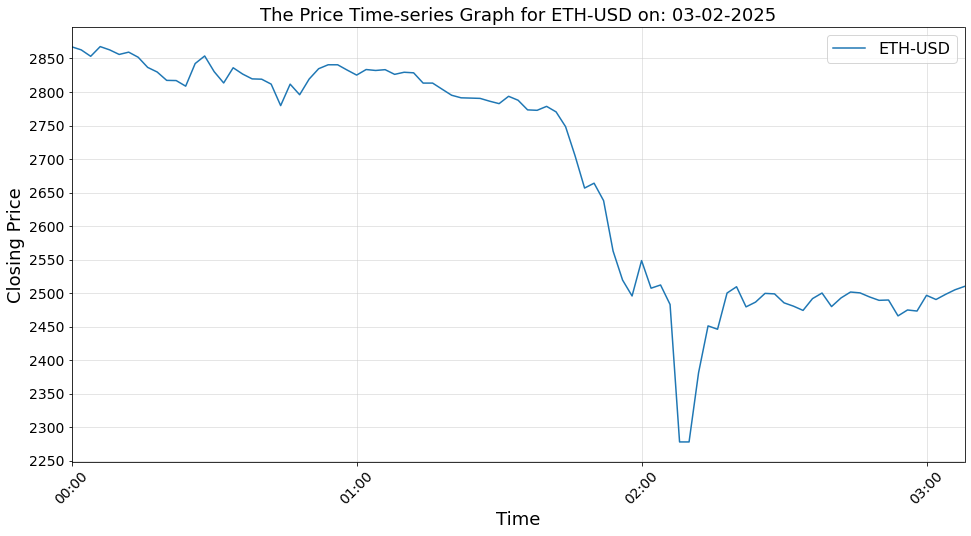

In [33]:
# Plotting the price timeseries graph for Ethereum data
plot_timeseries(eth_time_data, eth_price_data, ETH_ticker, HPV_date_eth, 1)

---

Due to the recent drop in Ethereum, the date of the HPV (Highest Price Volatility) just changed while editing the notebook. Therefore, once a full day has passed, the x-axis data of the plot above will load in its entirety. To demonstrate what the graph would look like when a full day's worth of data is loaded in (for the date of HPV), I have included a snapshot of the previous HPV date below:

---

### Ethereum Price Time-Series Graph Output: 2/02/2025 3pm 
### (the previous date of the HPV before the recent drop)

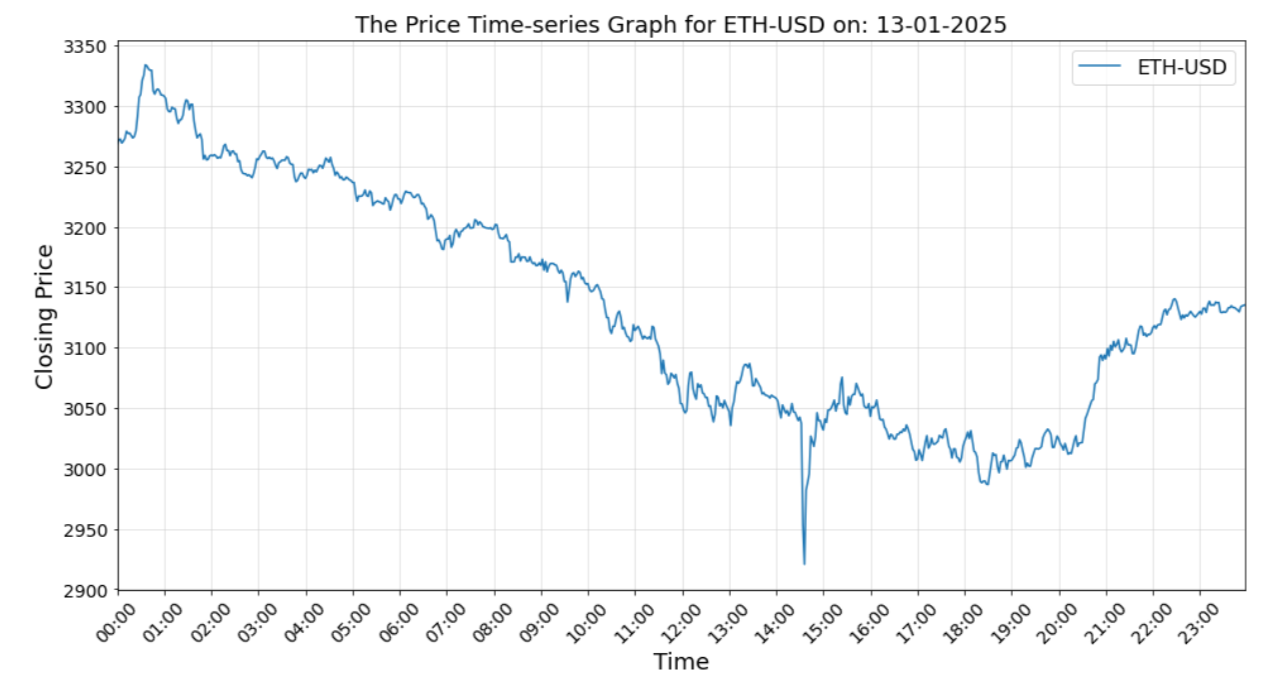

### Reference Ethereum Price Time-Series Graph (5 min intervals)
#### Source: https://uk.investing.com/crypto/ethereum/chart

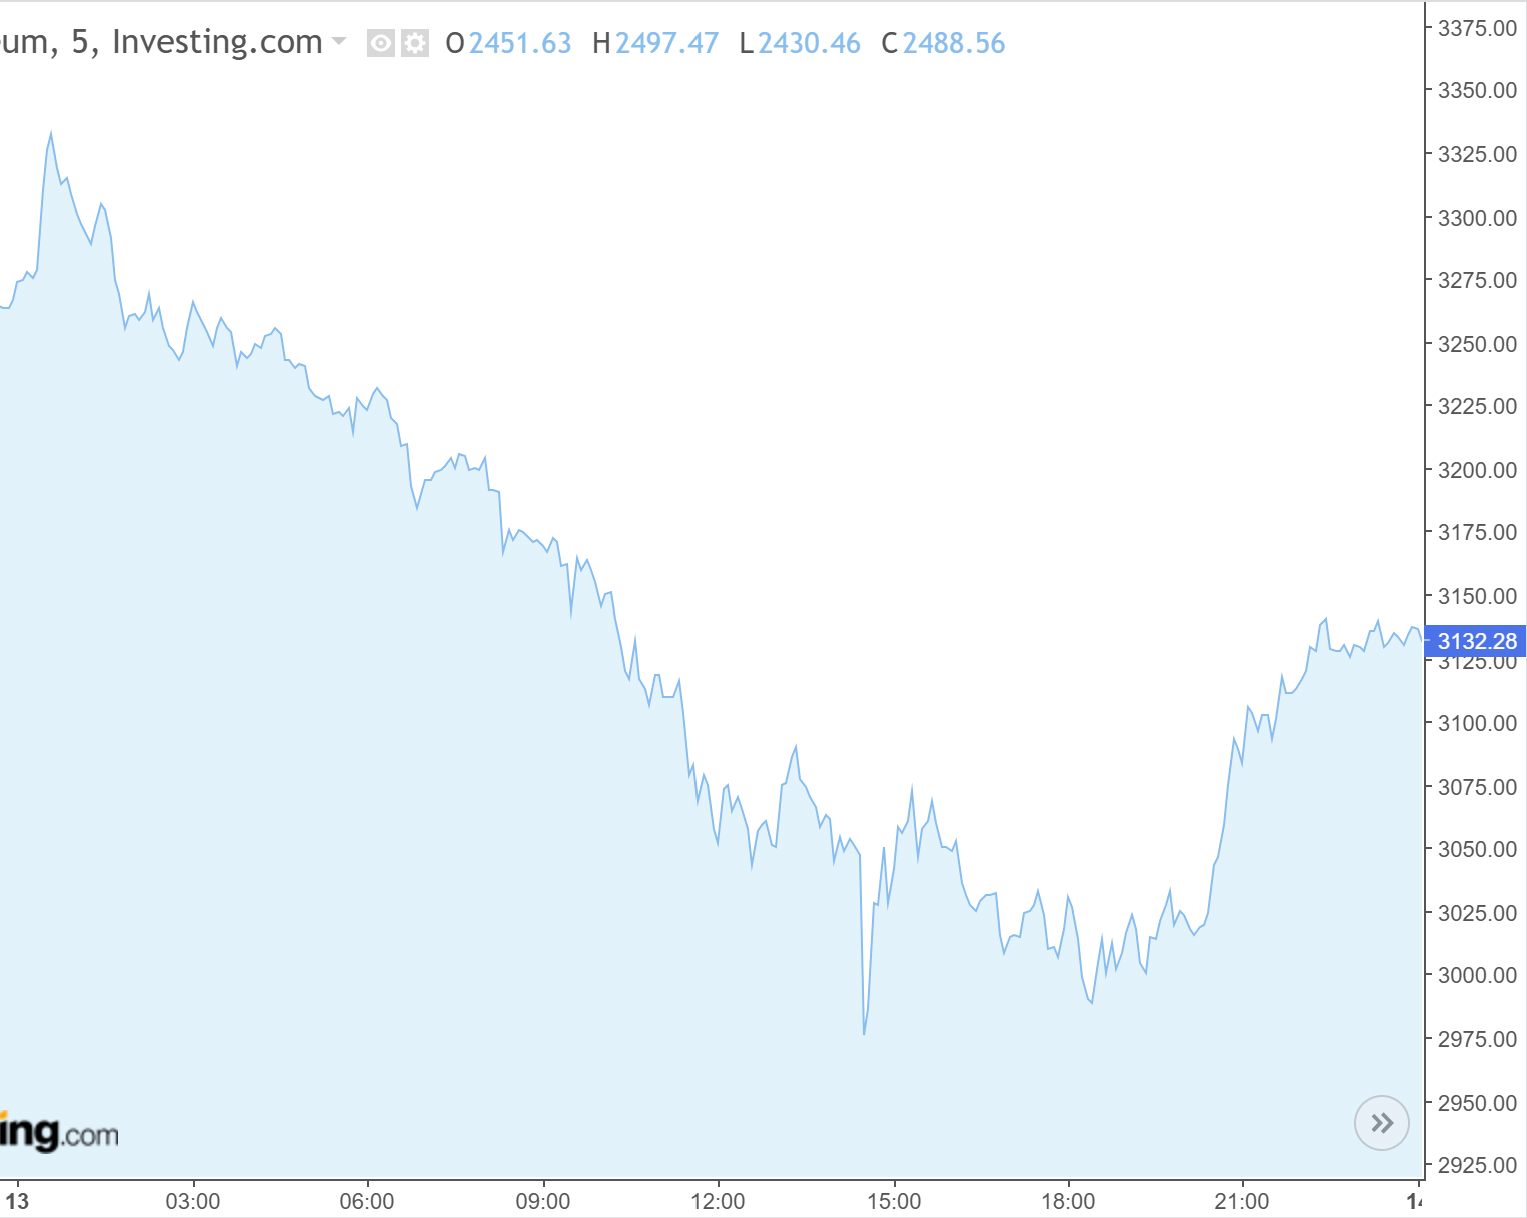

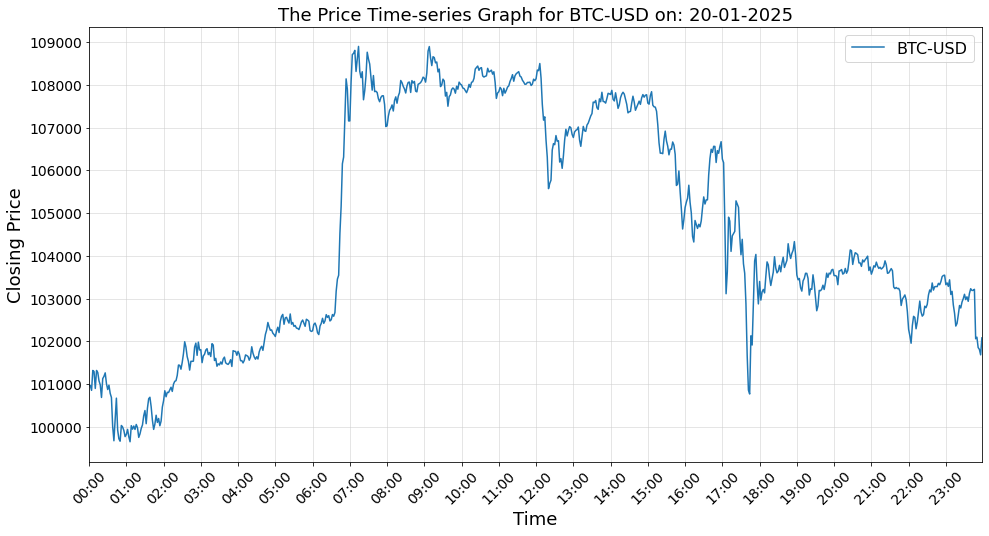

In [34]:
# Plotting the price timeseries graph for Bitcoin data
plot_timeseries(btc_time_data, btc_price_data, BTC_ticker, HPV_date_btc, 0)

### Reference Bitcoin Price Time-Series Graph (5 min intervals)
#### Source: https://uk.investing.com/crypto/bitcoin/chart

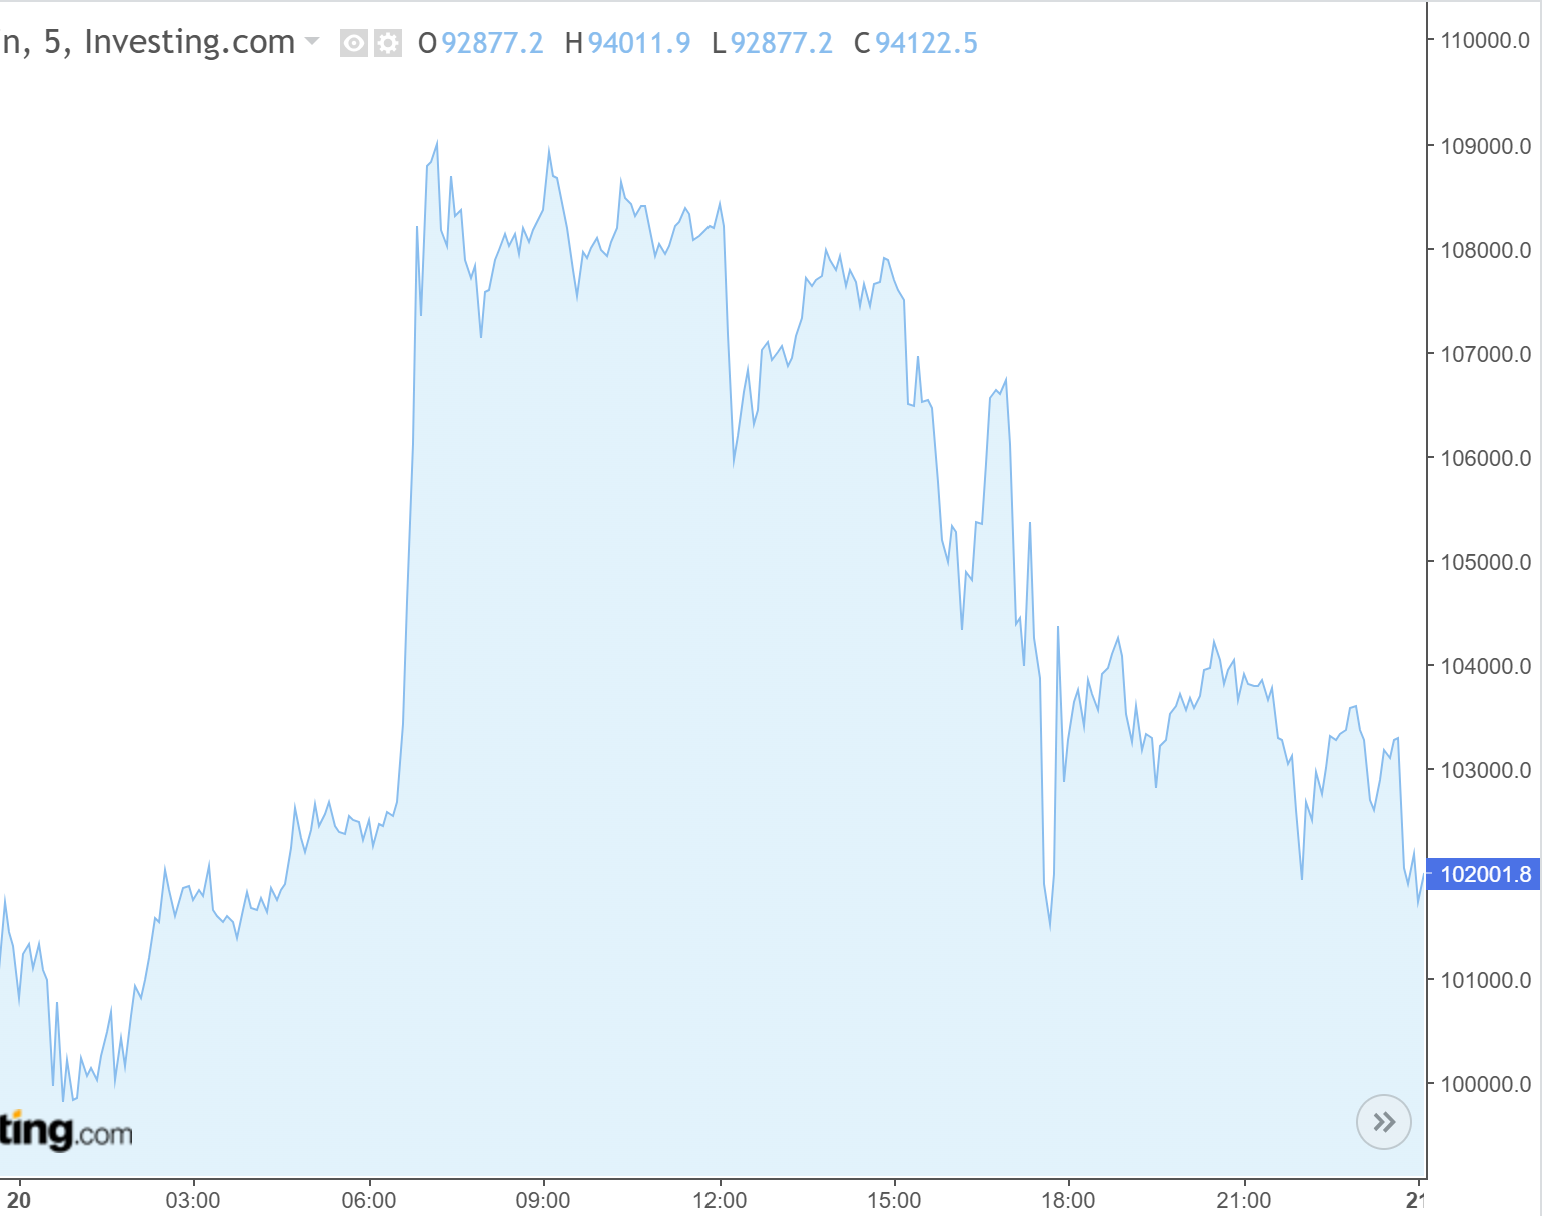

---

For these plots, I considered including data points in addition to the line graph. Although this added depth and insight to the graph, it also made it appear rather cluttered and made it difficult to visualise the overall trend. Therefore, I opted to only plot the line for clarity.

To validate the accuracy of these plots, I included screenshots of the price time-series plots of the crypto asset for the same time frame.

---

## **Q4)** Create Daily Candlestick (OHLC) Charts Using Matplotlib for Each Dataset. <span style="color:red;"><u>Bonus:</u></span> Overlay an SMA (Simple Moving Average) on Your Plots. 

---

**Approach**: For this task, the `collect_OHLC_prices()` function was called to extract each cryptocurrency's daily OHLC price data. This data would also be reviewed within a data frame, with checks on its length and the most recent entries to verify the data with online sources before plotting. 

This data is then fed into the `plot_OHLC_data()` function, which systematically creates the body, upper, and lower wick of the green and red candles before plotting the candlestick chart. Using inbuilt pandas functions such as `.rolling()` and `.mean()`, the SMA was also overlayed on the plots. By varying the window angle of `.rolling()`, I was also able to display the effect of varying the SMA look-back period.

---

In [35]:
# Calling the 'collect_OHLC_prices' function for Ethereum and Bitcoin to extract OHLC price data for plotting purposes

unique_date_eth, eth_opening_prices, eth_closing_prices, eth_highprice_data, eth_lowprice_data, eth_OHLC_df = collect_OHLC_prices(eth_dataR2, 0)
unique_date_btc, btc_opening_prices, btc_closing_prices, btc_highprice_data, btc_lowprice_data, btc_OHLC_df  = collect_OHLC_prices(btc_dataR2, 0)

In [36]:
# Calling the 'connect_df' function to display the daily OHLC data of Ethereum and Bitcoin side by side
connect_df(eth_OHLC_df, btc_OHLC_df, 6, 1)


,Date,Coin,Open,High,Low,Close,​,Coin,Open,High,Low,Close
0,2025-01-03,ETH-USD,3456.92,3626.73,3422.07,3605.18,,BTC-USD,96937.62,98917.23,96042.52,98101.70
1,2025-01-04,ETH-USD,3608.52,3668.68,3575.00,3659.71,,BTC-USD,98167.57,98725.25,97582.95,98256.76
2,2025-01-05,ETH-USD,3657.25,3673.37,3594.62,3633.77,,BTC-USD,98211.27,98796.51,97329.05,98319.66
3,2025-01-06,ETH-USD,3634.96,3742.59,3612.36,3688.83,,BTC-USD,98336.04,102464.44,97959.20,102228.51
4,2025-01-07,ETH-USD,3688.83,3701.11,3358.81,3380.68,,BTC-USD,102228.51,102674.33,96162.71,96936.19
5,2025-01-08,ETH-USD,3380.73,3413.01,3217.02,3326.29,,BTC-USD,96938.77,97247.41,92822.02,95038.31
6,2025-01-09,ETH-USD,3326.60,3355.37,3163.79,3220.13,,BTC-USD,95038.08,95314.75,91232.86,92480.14
7,2025-01-10,ETH-USD,3219.16,3320.39,3196.11,3268.36,,BTC-USD,92529.99,95750.38,92371.84,94685.27
8,2025-01-11,ETH-USD,3266.32,3316.61,3220.29,3281.51,,BTC-USD,94694.88,94933.29,93844.44,94555.15
9,2025-01-12,ETH-USD,3282.96,3297.51,3225.90,3266.95,,BTC-USD,94567.64,95290.35,93743.23,94491.41


---

When plotting the daily OHLC chart and comparing it with online references, tabulating and presenting the raw data allows me to cross-reference the graph, making it easier to accurately identify any errors or deviations from online OHLC price data.

---

In [37]:
def print_OHLC_data(unique_date_coin, coin_opening_prices, coin_closing_prices, coin_highprice_data, coin_lowprice_data, ticker):

    ''' This function prints the length of the OHLC price lists as well as the most recent OHLC prices for comparison and
    verification purposes for a given crypto asset

    Parameters:
        unique_date_coin: (list) The list of unique dates corresponding to the OHLC price data
        coin_opening_prices: (list) The opening prices for each date in the one month period
        coin_closing_prices: (list) The closing prices for each date in the one month period
        coin_highprice_data: (list) The highest prices for each date in the one month period
        coin_lowprice_data: (list) The lowest prices for each date in the one month period
        ticker: (str) The ticker symbol representing the crypto asset

    Return:
        This function prints the length and most recent OHLC prices for a given cypto asset
    '''

    
    print(f"-----{ticker}-----\n")
    
    # Printing the length of the OHLC price data for a selected crypto asset to check 
    # that they are all of the same size for further processing
    print(f"The length of the opening price data is: {len(coin_opening_prices)}")
    print(f"The length of the closing price data is: {len(coin_closing_prices)}")
    print(f"The length of the high price data is: {len(coin_highprice_data)}")
    print(f"The length of the low price data is: {len(coin_lowprice_data)}")

    # introducing a line break for clarity purposes
    print(f"\n")
    
    # Prints the most recent OHLC data for verifcation purposes in relation to online candlestick chart data
    print(f"For {unique_date_coin[-1]} the most recent OHLC prices are as follows:")
    print(f"Open:{coin_opening_prices[-1]:0.2f}")
    print(f"Close:{coin_closing_prices[-1]:0.2f}")
    print(f"High:{coin_highprice_data[-1]:0.2f}")
    print(f"Low:{coin_lowprice_data[-1]:0.2f}")
    

In [38]:
# Calling the 'print_OHLC_data' function for both Ethereum and Bitcoin to properties of the daily OHLC data
print_OHLC_data(unique_date_eth, eth_opening_prices, eth_closing_prices, eth_highprice_data, eth_lowprice_data, ETH_ticker)

print(f"\n")

print_OHLC_data(unique_date_btc, btc_opening_prices, btc_closing_prices, btc_highprice_data, btc_lowprice_data, BTC_ticker)


-----ETH-USD-----

The length of the opening price data is: 32
The length of the closing price data is: 32
The length of the high price data is: 32
The length of the low price data is: 32


For 2025-02-03 the most recent OHLC prices are as follows:
Open:2869.29
Close:2509.90
High:2869.29
Low:2196.84


-----BTC-USD-----

The length of the opening price data is: 32
The length of the closing price data is: 32
The length of the high price data is: 32
The length of the low price data is: 32


For 2025-02-03 the most recent OHLC prices are as follows:
Open:97663.91
Close:94201.27
High:97663.91
Low:91496.20


---

Before plotting, I decided to print out the length and most recent entries in our daily OHLC price data. This helps save time with error propagation later on when plotting, by reassuring myself that the basic requirements are met (e.g. plotting arrays of the same length). By clearly outputting the most recent entries, I can quickly cross-reference with online sources to ensure that my previous code is accurate. For example, online price tracking tools, display the most recent data first while having to dig deeper for historical data, which isn't always readily available or convenient.

---

In [39]:
def find_df_value(coin_data, date, time, a, col2, filter2):
    
    ''' This function filters and retrieves specific rows from a given dataframe based on the date, time, 
    and additional filtering criteria. The filtering logic differs based on the value of the parameter `a`.

    Parameters:
        coin_data: (dataframe) The dataframe containing the crypto asset's data
        date: (str or datetime) The date to filter the dataframe by
        time: (str or datetime) The time to filter the dataframe by (only applicable when `a` is not 1)
        a: (int) A flag to determine which filtering condition to apply
        col2: (str) The column name to apply the additional filter when `a` is 1
        filter2: (any) The value used to filter the `col2` column when `a` is 1

    Return:
        filtered_df: (dataframe) A filtered dataframe containing rows that meet the specified criteria
    '''

    # A if statement which filters the coin's dataframe based of a specific date and another column metric (if a == 1) or 
    #by a specfic date and time. This enables the user to view the context behind the OHLC price data for a coin for 
    # validation purposes
    
    if a == 1:
        
        # Round the desired column and filter to 2d.p for consistent filtering
        coin_data[col2] = coin_data[col2].round(2)
        rounded_filter = round(filter2, 2)
        
        #converts the date and time to a proper datetime object and extracts the date respectively
        specific_date = pd.to_datetime(date).date()
        
        # Filters the dataframe for a specific date and column value
        filtered_df = eth_dataR2[(eth_dataR2['date'] == specific_date) & (eth_dataR2[col2] == filter2)]
        
    else:
        
        #converts the date and time to a proper datetime object and extracts the date and time respectively
        specific_date = pd.to_datetime(date).date()
        specific_time = pd.to_datetime(time).time()
        # Formats the time column of the dataframe  appropriately
        eth_dataR2['time'] = pd.to_datetime(eth_dataR2['time'], format='%H:%M:%S').dt.time
        
        # Filters the dataframe for a specific date and specific time
        filtered_df = eth_dataR2[(eth_dataR2['date'] == specific_date) & (eth_dataR2['time'] == specific_time)]
        
    # Prints and returns the filtered dataframe    
    print(filtered_df)
    
    return filtered_df
    

In [40]:
# Calling the 'filtered_df_value' function to find the closing price of the most recent date
# This is to help us validate the accuracy our fitlering and computing processes within function 
# by comparing it to online references

#Places a = 0 to filter rows in the dataframe by date and time only
filtered_df = find_df_value(eth_dataR2, unique_date_eth[-2], "20:18:00", 0, 'Low', 3214.94)


                       Datetime     Coin    Open    High     Low   Close  \
22114 2025-02-02 20:18:00+00:00  ETH-USD 2977.52 2977.80 2977.52 2977.80   

         Volume        date      time  
22114  16031744  2025-02-02  20:18:00  


---

When verifying the validity of the most recent entries, I realised there were slight deviations of the order of 1 or 2 decimal places with the most recent OHLC price data from online sources. To investigate this, I wanted to access the two-minute interval data to identify if, at a 2-minute granularity, there is alignment. I quickly realised using the default in-built pandas functions such as `.loc()` to filter my data frame by different columns and rows was becoming arduous. So, I defined the `find_df_value` function to streamline this process, allowing me to investigate different parameters and columns within the data frame dynamically.

This investigation showed that my results nearly aligned completely with online sources, albeit with some minor deviations. I attribute this to different ways in which different online sources report data. For example, different sources may report data with differences in data granularity - such as varying update frequencies or rounding methods.

---

In [41]:
def plot_OHLC_data(unique_date, opening_prices, closing_prices, highprice_data, lowprice_data, ticker, SMA_rollback, condition):
    
    ''' This function generates and plots the OHLC price data as a candlestick chart for a specific crypto coin.
    It overlays a Simple Moving Average (SMA) to help visualize price trends.

    Parameters:
        unique_date: (list) The list of unique dates for the one-month period
        opening_prices: (list) The opening prices for each date
        closing_prices: (list) The closing prices for each date
        highprice_data: (list) The highest prices for each date
        lowprice_data: (list) The lowest prices for each date
        ticker: (str) The ticker symbol representing the crypto coin
        SMA_rollback: (int) The period for calculating the Simple Moving Average (SMA)

    Return:
        None: This function displays the candlestick plot directly.
    '''

    # Creates a dataframe of the OHLC price data for a specific crypto asset
    stock_price_df = pd.DataFrame({
    
    'Date': unique_date,
    'Open': opening_prices,
    'Close': closing_prices,
    'High': highprice_data,
    'Low': lowprice_data,

     })
    
    # Computes the SMA of the daily closing prices for a specified lookback period
    stock_price_df["SMA"] = stock_price_df["Close"].rolling(window=SMA_rollback).mean()

    
    # Stores all the price values where the closing price is greater than or equal to the opening price for a specific day
    # If stock prices have increased - it will be represented by a green candlestick
    g_candle = stock_price_df[stock_price_df['Close'] >= stock_price_df['Open']]
    
    # Stores all the price values where the opening price is greater than or equal to the closing price for a specific day
    # if stock prices have decreased - it will be represented by the red candlestick
    r_candle = stock_price_df[stock_price_df['Open'] >= stock_price_df['Close']]
    
    # Colours of the candlesticks
    green = 'green'
    red = 'red'
    
    # Establishing the widths of the body and wicks of the candlesticks 
    width_body = .3
    width_wick = .09
    
    plt.figure(figsize=(16, 8))  

    #For the Green candlestick:
    
    # Creating the real body
    plt.bar(g_candle['Date'], g_candle['Close'] - g_candle['Open'], width_body, bottom = g_candle['Open'], color= green)
    # Creating the upper wick
    plt.bar(g_candle['Date'], g_candle['High'] - g_candle['Close'], width_wick, bottom = g_candle['Close'], color= green)
    #Creating the lower wick 
    plt.bar(g_candle['Date'], g_candle['Close'] - g_candle['Low'], width_wick, bottom = g_candle['Low'], color= green)
    
    
    # Overlaying the SMA over our plot
    plt.plot(stock_price_df["Date"], stock_price_df["SMA"], color='0.2', label= f'SMA ({SMA_rollback}-day moving average)')
    
    
    #For the Red candlestick:
    
    # Creating the real body
    plt.bar(r_candle['Date'], r_candle['Open'] - r_candle['Close'], width_body, bottom = r_candle['Close'], color= red)
    # Creating the upper wick
    plt.bar(r_candle['Date'], r_candle['High'] - r_candle['Close'], width_wick, bottom = r_candle['Close'], color= red)
    #Creating the lower wick 
    plt.bar(r_candle['Date'], r_candle['Close'] - r_candle['Low'], width_wick, bottom = r_candle['Low'], color= red)
    
    # Adjusting the number of ticks displayed on the x axis and the format of these x axis ticks.
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(bymonthday=None, interval=2, tz=None))
    # Formating the date as DD-MM-YYYY
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d-%m-%Y"))  
    
    # Creating a if condition to dynamically adjust the tick spacing on the y axis based on the price data
    # of the cyptocurrency of interest
    if condition == 1:
        # Adjusting the y-axis ticks to appear every 100 units
        plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(100)) 
    else:
        # Adjusting the y-axis ticks to appear every 2000 units
        plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(2000))

    
    # Formatting the plot for a given title and ticker using the format_plot function
    format_plot("Daily Candlestick Chart for ", ticker, 0 ,0)
  

---

### Exploring Candlestick Charting Methods

While researching methods to plot the candlestick chart using Matplotlib, I came across a common approach of using the mpl_finance module for such applications. This module gave access to the `candlestick_ohlc()` function, which allowed the user to simply extract values from an OHLC data frame and plot them seamlessly. 

Although this approach appears to be very efficient and concise,  I chose to manually construct each aspect of the green and red candlesticks, as demonstrated in the code above. This involved filtering the data frame for rows where the daily closing prices were greater or equal to the opening prices and storing this data within a data frame to create green candle sticks and vice versa for red candle sticks. Then I would use the relevant columns within each data frame to create and plot the candlestick's upper/lower wicks and main body. This involved analysing each aspect of the candlestick structure and understanding what they meant before applying transformations to the data frames to reflect these candle sticks' structural properties.

This might not be the most efficient approach, but it gave me a better understanding of how to plot a candlestick chart from scratch. It also makes troubleshooting more effective, as I can inspect and control every part of my code. If I had to rely on the mpl_finance module, I would be limited by my understanding of the inner processes of the `candlestick_ohlc()` function. This might make error diagnosis more cumbersome and time-consuming.

---

### **SMA Overlay**

Overlaying the SMA over the plots was achieved using in-built Panda functions. The argument of the `.rollabck(window=)` function enabled me to vary the lookback period of the SMA accordingly. To confirm I had the correct idea behind the definition of the SMA, I reviewed how it was calculated. From this, I settled on using the `.mean()` function to be applied to the 'Close' column in addition to the `.rollabck(window=)` function. I selected the closing price to calculate the SMA as it is widely considered the most reliable and stable indicator for future trends and hence used in technical analysis. Furthermore, the close price helps reflect the market sentiment by representing the final consensus between buyers and sellers of a specific asset at the end of a trading period. Addtionally, open, high and low price metrics are more likely to be subject to intraday volatility and hence are less ideal for helping calculate and visualise long-term trends.

---

## **Q4)** Result

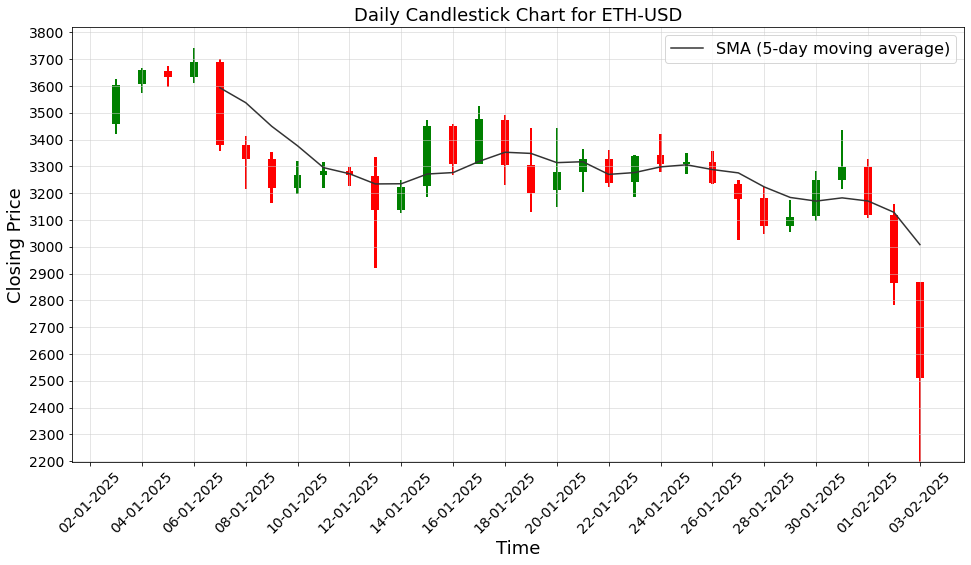

In [42]:
# Plotting the daily candlestick chart for ETH-USD with a 5-day SMA
plot_OHLC_data(unique_date_eth, eth_opening_prices, eth_closing_prices, eth_highprice_data, eth_lowprice_data, ETH_ticker, 5, 1)


### Ethereum Candlestick Chart Output, Date: 3/02/2025 02:45 AM


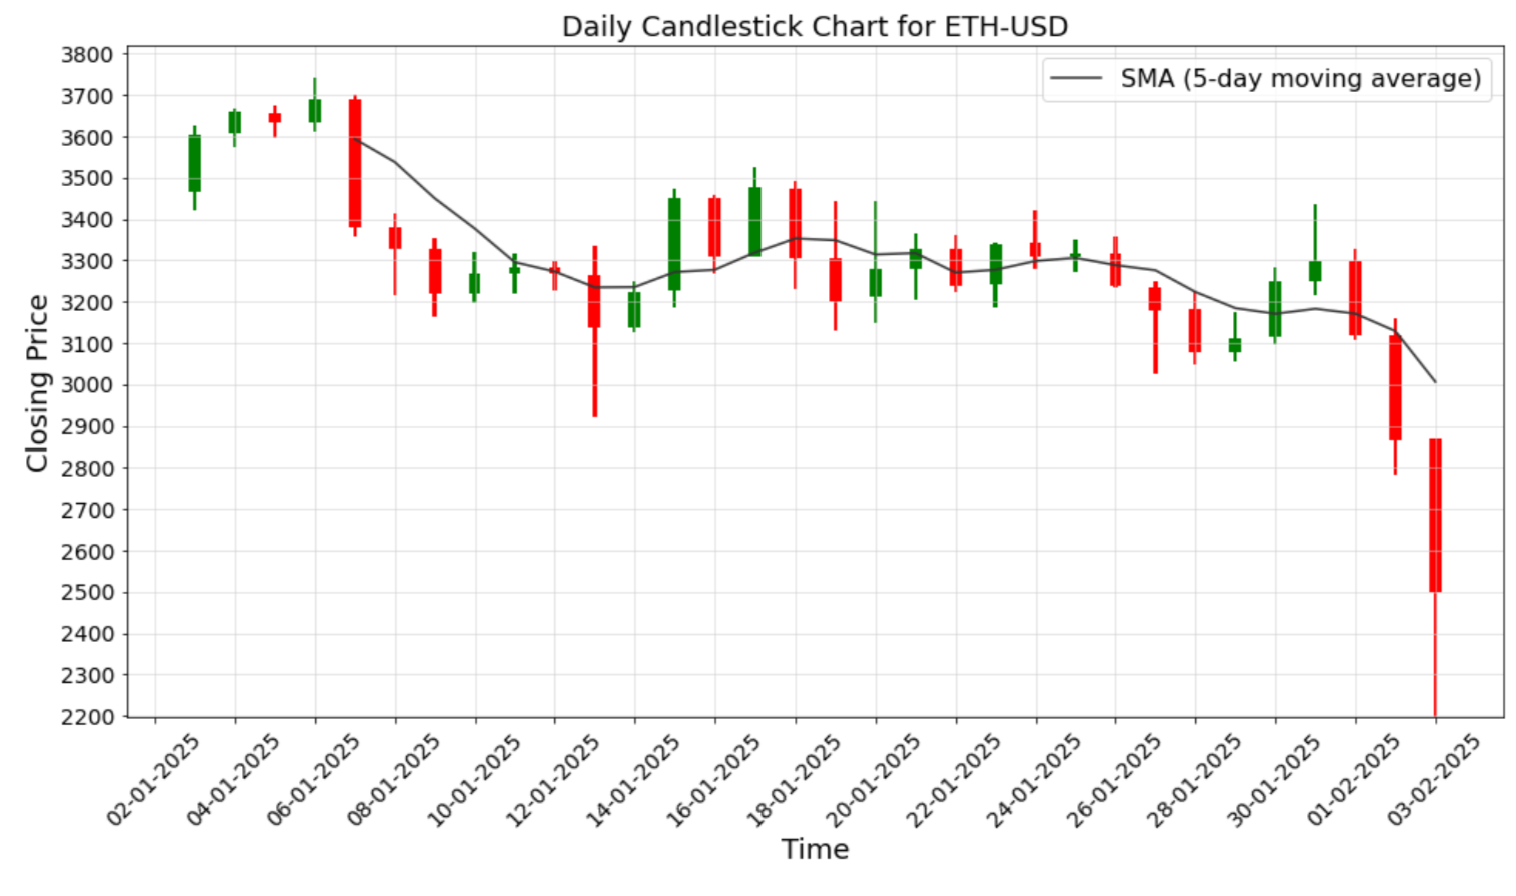

### Ethereum Candlestick Chart Reference, Acessed: 3/02/2025 02:42 AM

### source:https://uk.investing.com/crypto/ethereum/chart

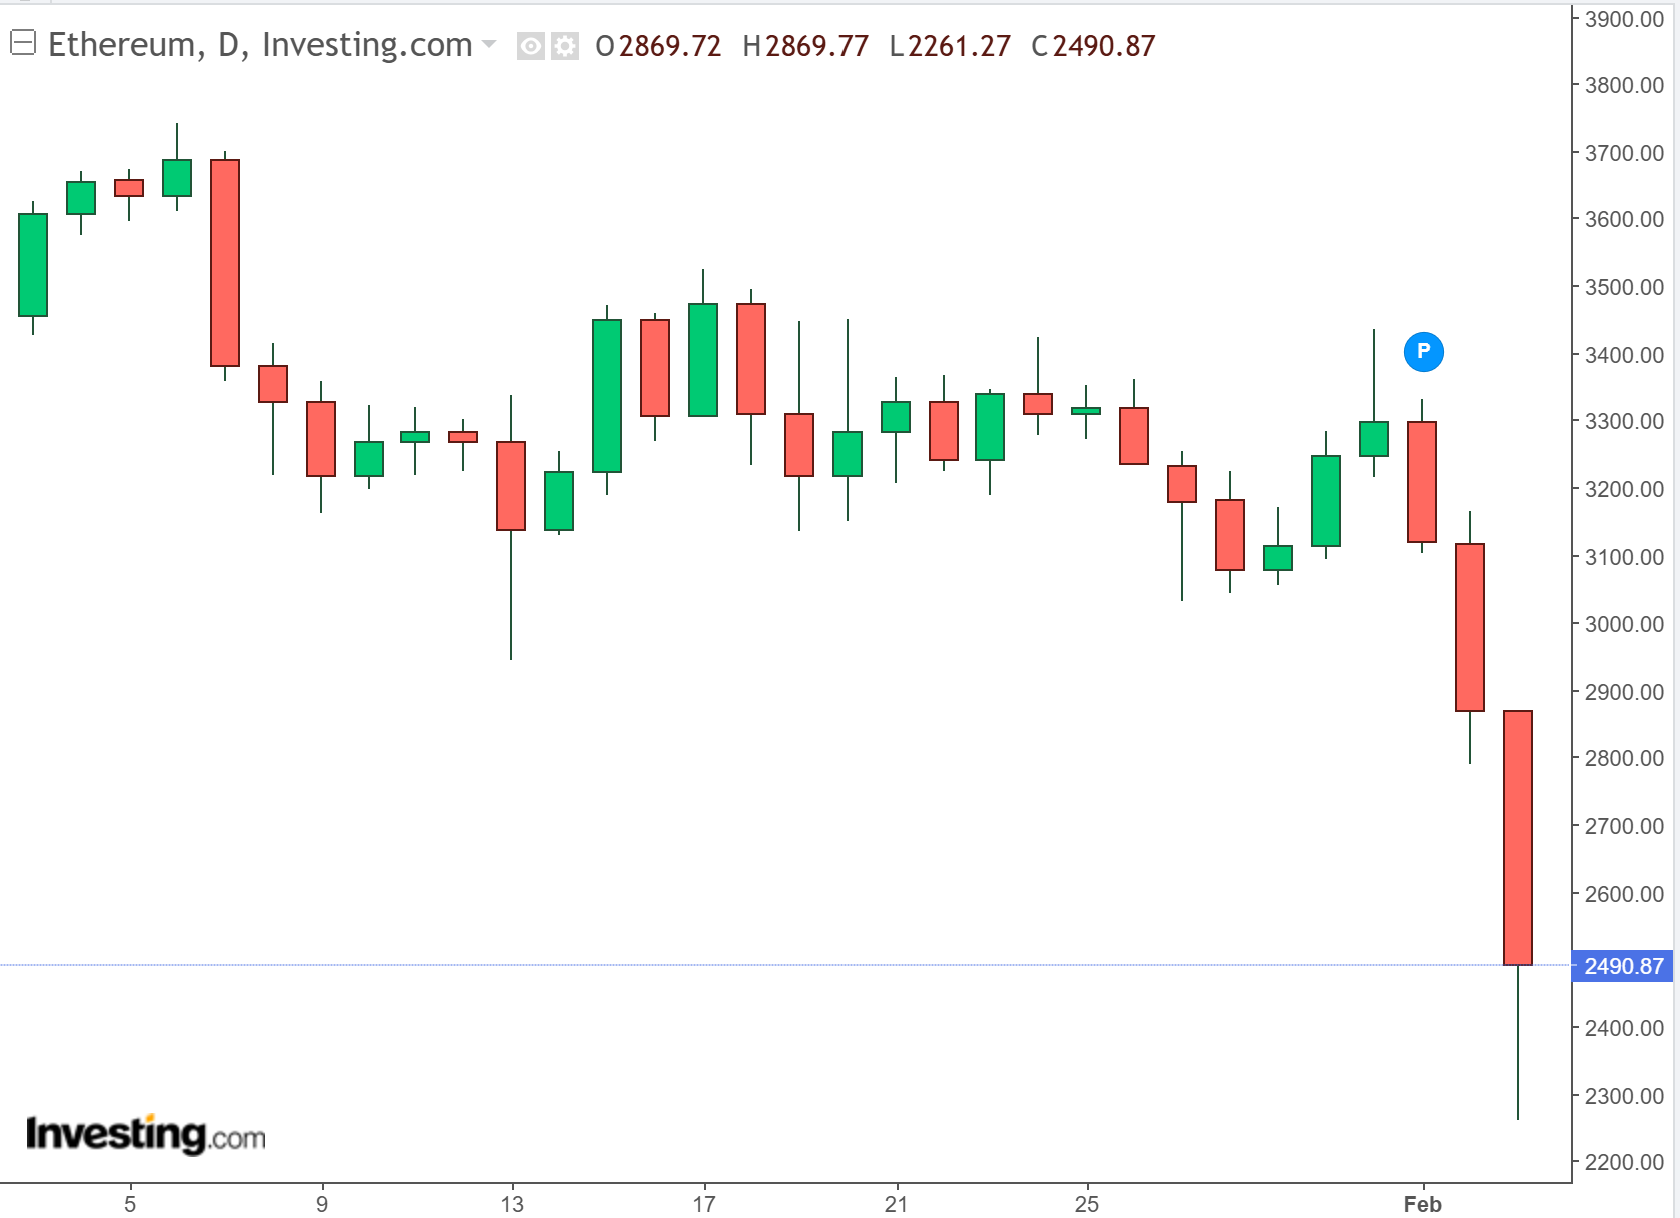

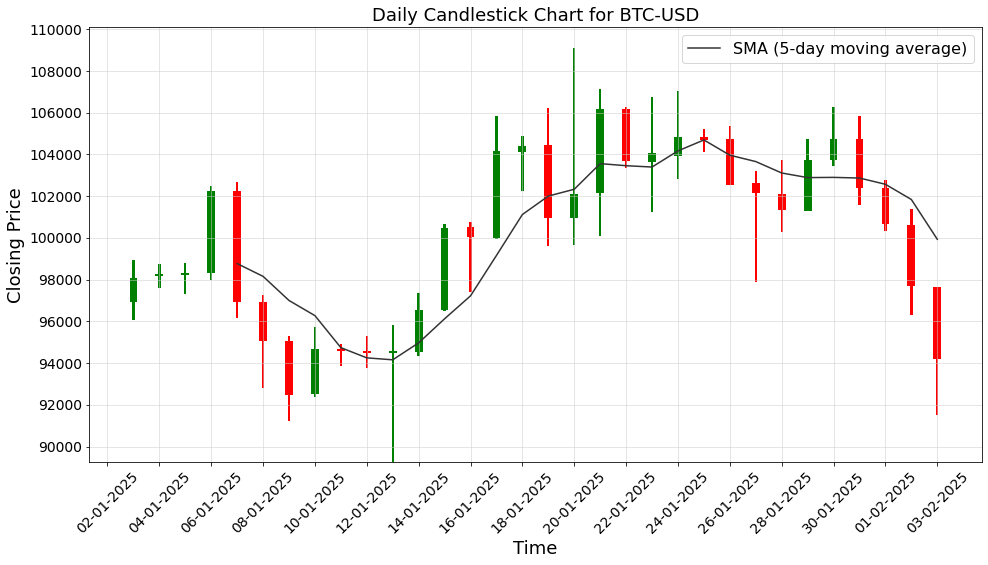

In [43]:
# Plotting the daily candlestick chart for BTC-USD with a 5-day SMA
plot_OHLC_data(unique_date_btc, btc_opening_prices, btc_closing_prices, btc_highprice_data, btc_lowprice_data, BTC_ticker, 5, 0)


### Bitcoin Candlestick Chart Output, Date: 3/02/2025 02:33 AM


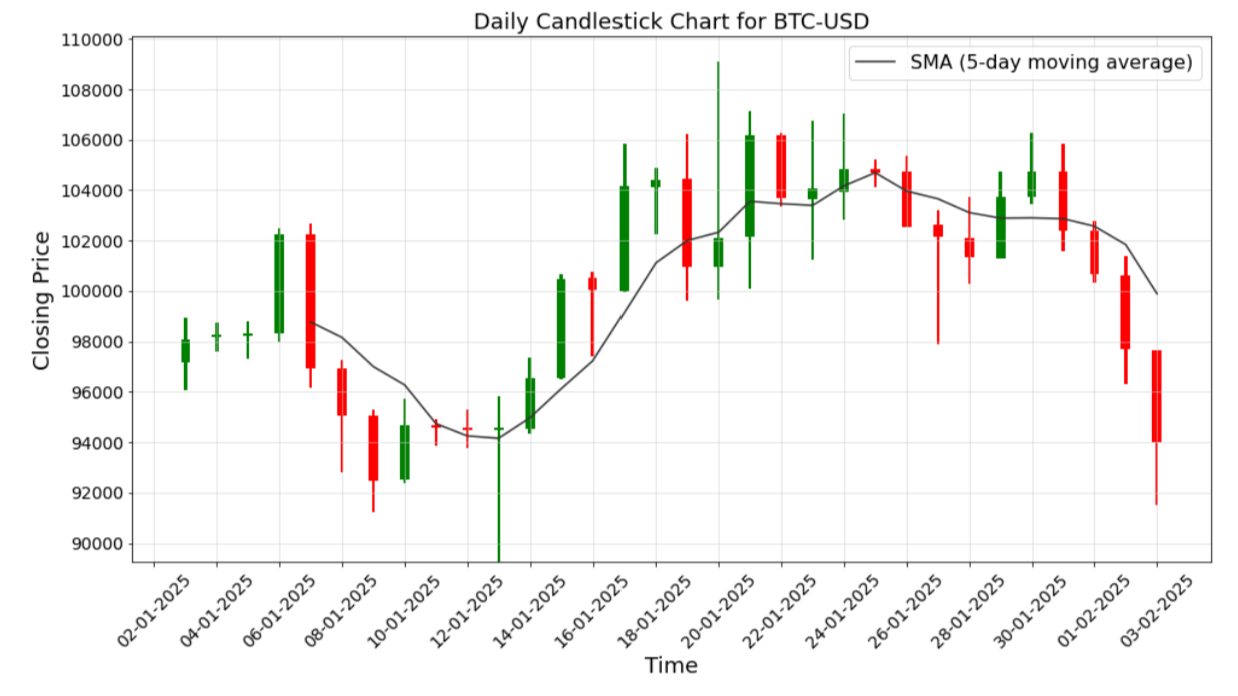

### Bitcoin Candlestick Chart Reference, Accessed: 3/02/2025 02:31 AM

### **source**:https://uk.investing.com/crypto/bitcoin/chart

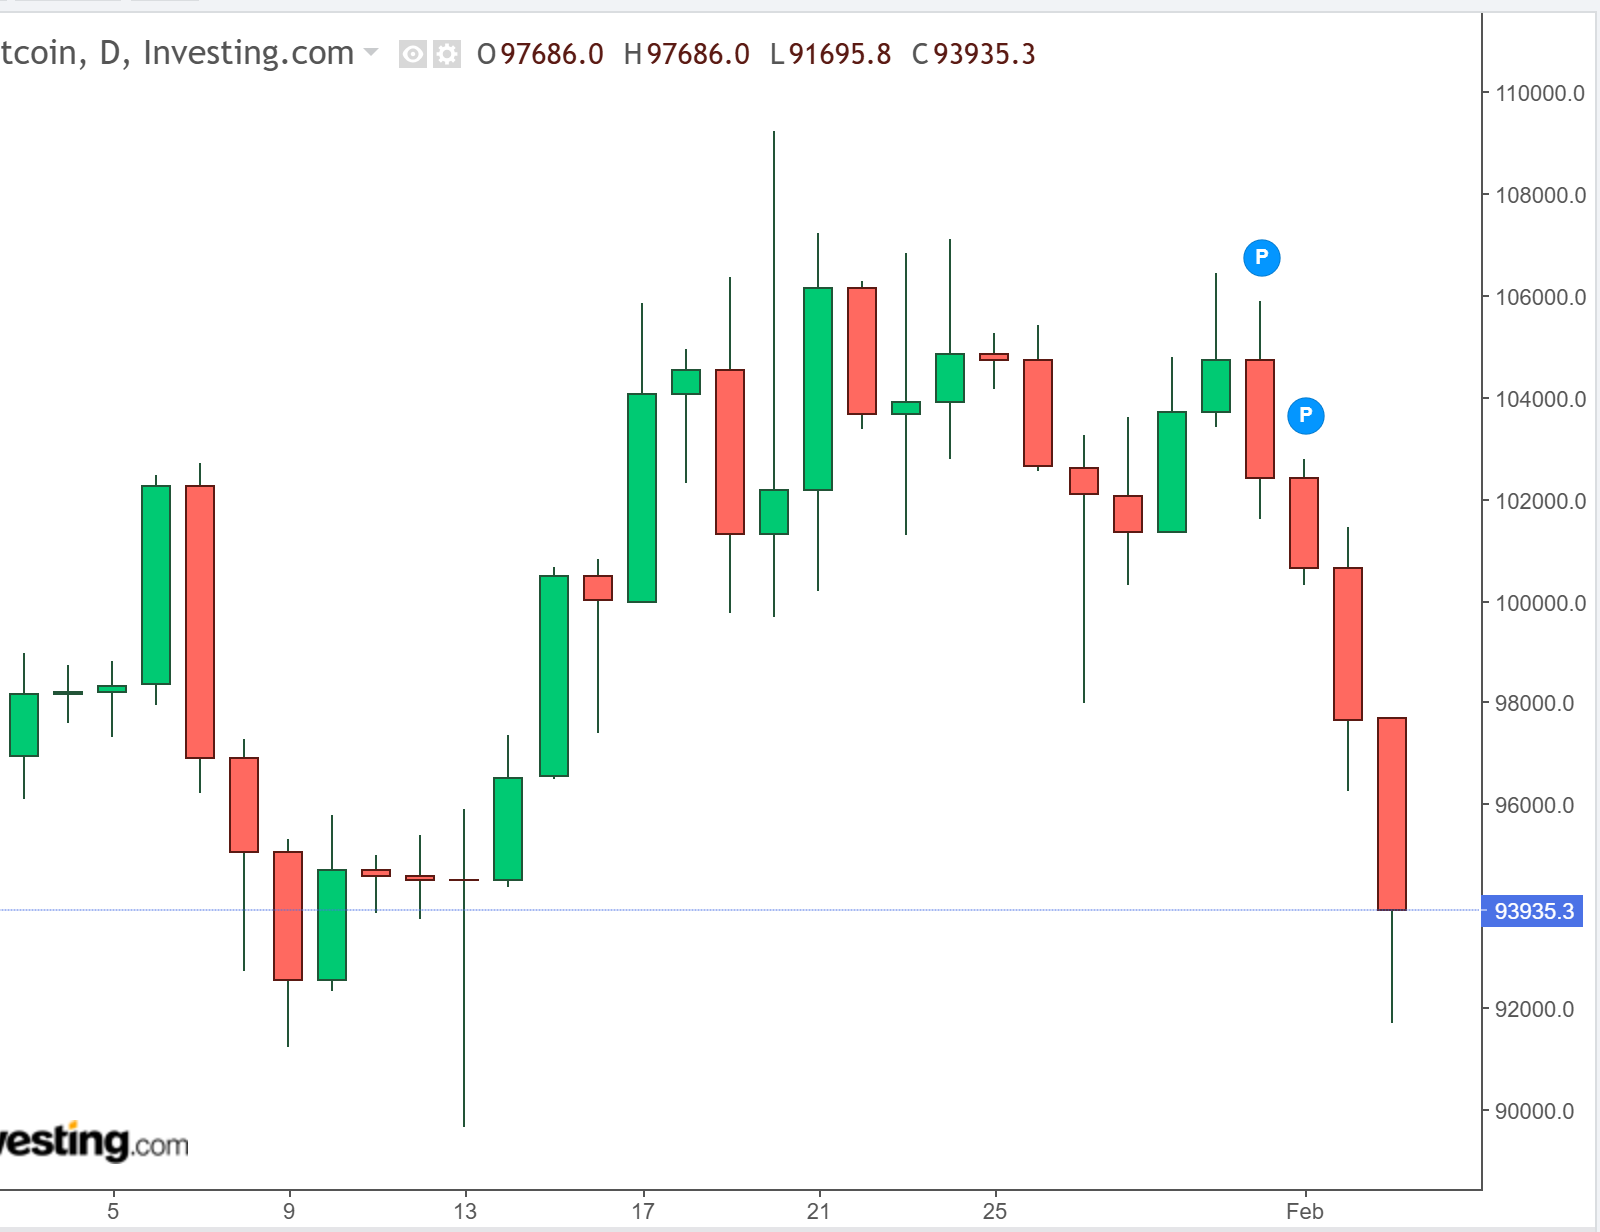

## **Q4.1)**  <span style="color:red;"><u>Bonus:</u></span> Show the Effects of Varying the SMA Lookback Period

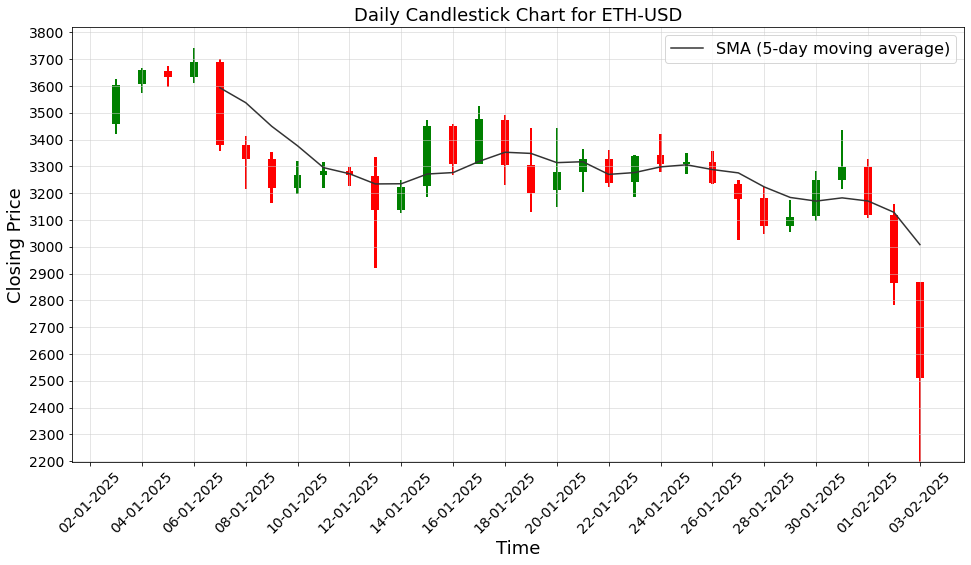

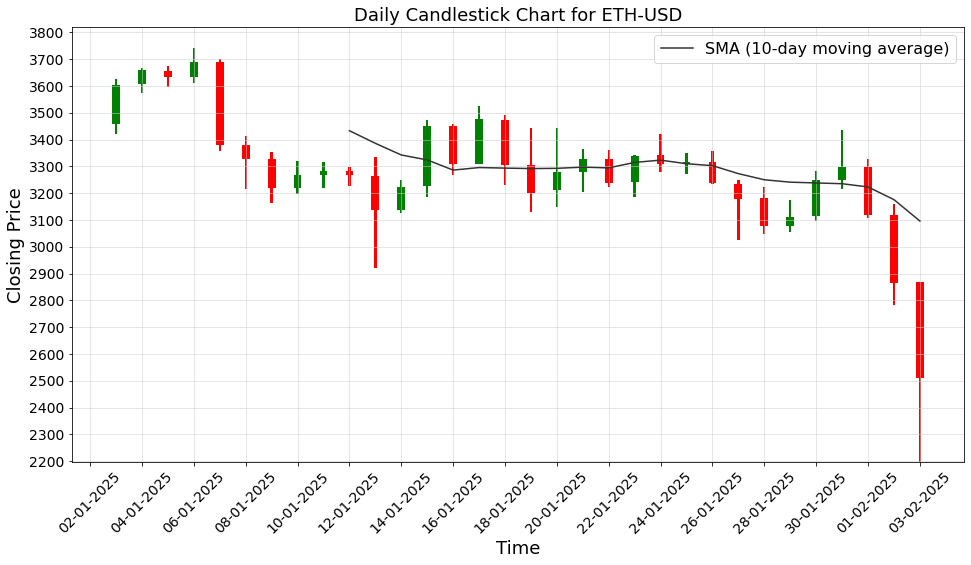

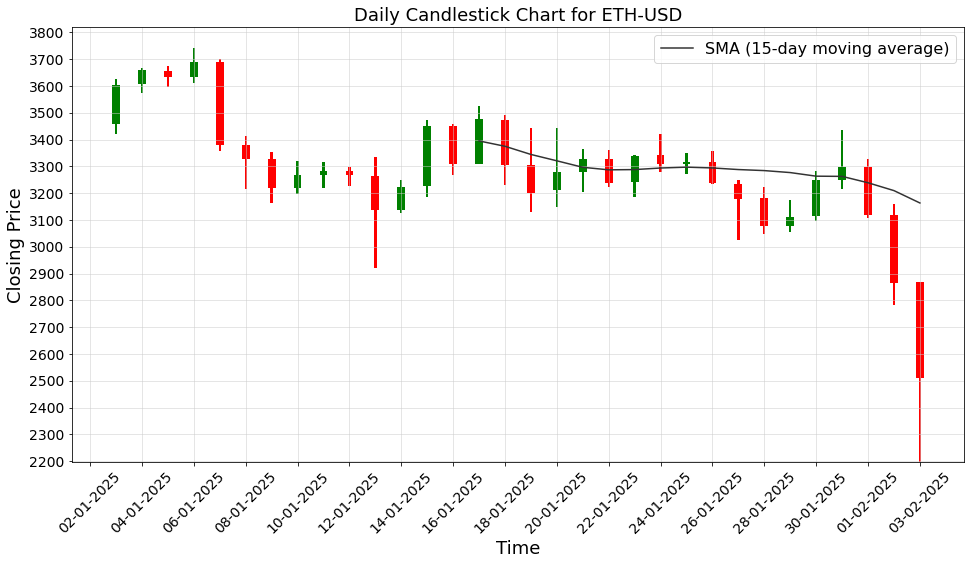

In [44]:
# Plotting the daily candlestick chart for different SMA lookabck periods of 5, 10 and 15 days by calling
# the 'plot_OHLC_data' function for 'ETH-USD'
plot_OHLC_data(unique_date_eth, eth_opening_prices, eth_closing_prices, eth_highprice_data, eth_lowprice_data, ETH_ticker, 5, 1)
plot_OHLC_data(unique_date_eth, eth_opening_prices, eth_closing_prices, eth_highprice_data, eth_lowprice_data, ETH_ticker, 10, 1)
plot_OHLC_data(unique_date_eth, eth_opening_prices, eth_closing_prices, eth_highprice_data, eth_lowprice_data, ETH_ticker, 15, 1)


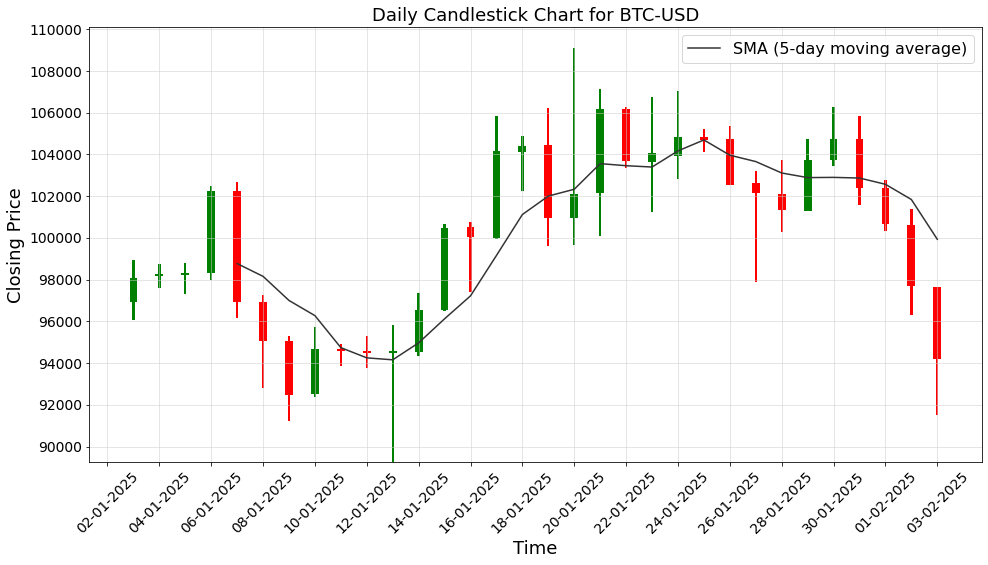

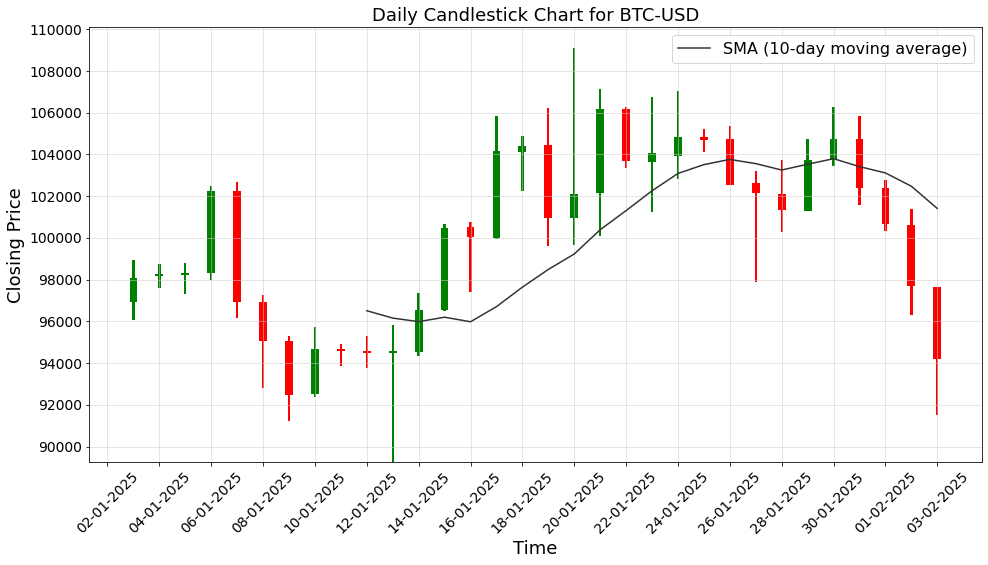

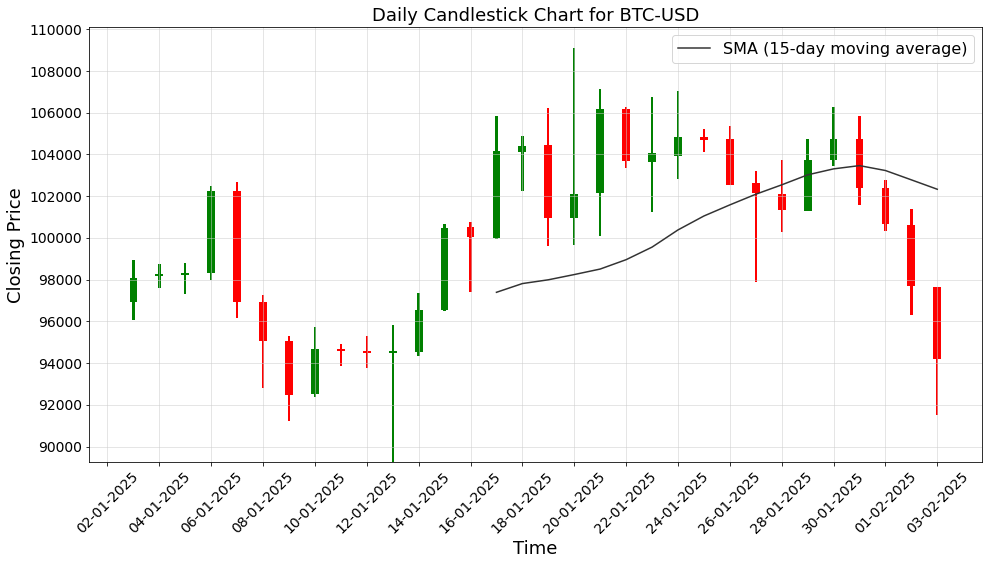

In [45]:
# Plotting the daily candlestick chart for different SMA lookabck periods of 5, 10 and 15 days by calling
# the 'plot_OHLC_data' function for 'BTC-USD'
plot_OHLC_data(unique_date_btc, btc_opening_prices, btc_closing_prices, btc_highprice_data, btc_lowprice_data, BTC_ticker, 5, 0)
plot_OHLC_data(unique_date_btc, btc_opening_prices, btc_closing_prices, btc_highprice_data, btc_lowprice_data, BTC_ticker, 10, 0)
plot_OHLC_data(unique_date_btc, btc_opening_prices, btc_closing_prices, btc_highprice_data, btc_lowprice_data, BTC_ticker, 15, 0)


---

### Varying the SMA look-back period

When varying the SMA look-back periods for both data sets, I noticed that the 5-day SMA aligns more closely with the daily price fluctuations. Therefore, a short lookback period is effective for capturing short-term trends. However, this 5-day SMA tracks the price changes more closely and is, thus, more prone to short-term volatility, suggesting that, at times, it might be swayed by volatility due to noise and brief price spikes or anomalies.

As the lookback period increases from 5 to 10 to 15 days, it is clear that the SMA results in a smoother curve that is less influenced by short-term price movements. The 15-day SMA, for example, is better at capturing long-term trends but might struggle to keep track of current and the most up to date price changes. This might be detrimental, especially during cases of short-term reversals in the crypto's asset price. Due to the limited period of data we have accessed, the SMA with longer look-back periods are limited by the size of the data plotted and may not be ideal for the size of the dataset I downloaded. 

---